# Air Quality Forecasting using Time Series Machine Learning Models

## Notebook 2: Exploratory Data Analysis - Aotizhongxin monitoring station

## 1.0. Introduction
### 1.1. Project Goal
The goal of this project is to develop a machine learning model that predicts future air quality levels based on historical air quality data and relevant environmental factors.
### 1.2. Context/ Problem Statement
A few years ago, China established the Air Quality Index (AQI) based on the level of five pollutants atmospheres, namely sulfur dioxide (SO2), nitrogen dioxide (NO2), particulate matter (PM10), carbon monoxide (CO) and ozone (O3) measured at the monitoring stations in each city.

## 2.0. Installing & Importing Libraries

In [71]:
# Libraries required for data analysis, visualization, and preprocessing
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline
import math  # For mathematical operations

## 3.0. Importing Data

In [3]:
# Load the csv file to use for feature engineering.
Aotizhongxin_clean = pd.read_csv('/Users/h.nderitu/Advanced Machine Learning/advml-week3project/Aotizhongxin_clean_data.csv')

#Display the first few rows
Aotizhongxin_clean.head()

#Display the DataFrame info
Aotizhongxin_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      35064 non-null  object 
 1   year          35064 non-null  int64  
 2   month         35064 non-null  int64  
 3   day           35064 non-null  int64  
 4   hour          35064 non-null  int64  
 5   PM2.5         35064 non-null  float64
 6   PM10          35064 non-null  float64
 7   SO2           35064 non-null  float64
 8   NO2           35064 non-null  float64
 9   CO            35064 non-null  float64
 10  O3            35064 non-null  float64
 11  TEMP          35064 non-null  float64
 12  PRES          35064 non-null  float64
 13  DEWP          35064 non-null  float64
 14  RAIN          35064 non-null  float64
 15  wd            35064 non-null  object 
 16  WSPM          35064 non-null  float64
 17  wd_direction  35064 non-null  float64
dtypes: float64(12), int64(4), 

In [4]:
# change datetime column to datetime datatype
Aotizhongxin_clean['datetime'] = pd.to_datetime(Aotizhongxin_clean['datetime'], format='%Y-%m-%d %H:%M:%S')

# confirm change to datetime column
Aotizhongxin_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      35064 non-null  datetime64[ns]
 1   year          35064 non-null  int64         
 2   month         35064 non-null  int64         
 3   day           35064 non-null  int64         
 4   hour          35064 non-null  int64         
 5   PM2.5         35064 non-null  float64       
 6   PM10          35064 non-null  float64       
 7   SO2           35064 non-null  float64       
 8   NO2           35064 non-null  float64       
 9   CO            35064 non-null  float64       
 10  O3            35064 non-null  float64       
 11  TEMP          35064 non-null  float64       
 12  PRES          35064 non-null  float64       
 13  DEWP          35064 non-null  float64       
 14  RAIN          35064 non-null  float64       
 15  wd            35064 non-null  object

In [5]:
# Set 'datetime' column as index
Aotizhongxin_clean.set_index('datetime', inplace=True)

# confirm datetime column is an index
Aotizhongxin_clean.head()

year  month  day  hour  PM2.5  PM10   SO2   NO2     CO  \
datetime                                                                      
2013-03-01 00:00:00  2013      3    1     0    4.0   4.0   4.0   7.0  300.0   
2013-03-01 01:00:00  2013      3    1     1    8.0   8.0   4.0   7.0  300.0   
2013-03-01 02:00:00  2013      3    1     2    7.0   7.0   5.0  10.0  300.0   
2013-03-01 03:00:00  2013      3    1     3    6.0   6.0  11.0  11.0  300.0   
2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  12.0  12.0  300.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  wd_direction  
datetime                                                                      
2013-03-01 00:00:00  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4         337.5  
2013-03-01 01:00:00  77.0  -1.1  1023.2 -18.2   0.0    N   4.7           0.0  
2013-03-01 02:00:00  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6         337.5  
2013-03-01 03:00:00  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1         315.0  
2013-03-01 04:00:00  72.0  -2.0  1025.2 -19.5   0.0    N   2.0           0.0

In [6]:
# set the frequency of the data as hourly to change to time series data
Aotizhongxin_clean_ts = Aotizhongxin_clean.asfreq('h')

print(f"Data for Aotizhongxin station set to hourly frequency")
Aotizhongxin_clean_ts.info() 

Data for Aotizhongxin station set to hourly frequency
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Freq: h
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          35064 non-null  int64  
 1   month         35064 non-null  int64  
 2   day           35064 non-null  int64  
 3   hour          35064 non-null  int64  
 4   PM2.5         35064 non-null  float64
 5   PM10          35064 non-null  float64
 6   SO2           35064 non-null  float64
 7   NO2           35064 non-null  float64
 8   CO            35064 non-null  float64
 9   O3            35064 non-null  float64
 10  TEMP          35064 non-null  float64
 11  PRES          35064 non-null  float64
 12  DEWP          35064 non-null  float64
 13  RAIN          35064 non-null  float64
 14  wd            35064 non-null  object 
 15  WSPM          35064 non-null  float64
 16  wd_direction  3

### Description of the Aotizhongxin station dataset
- The dataset consists of 35,064 hourly observations and 17 columns. 
- There are 6 target variables, namely:
  - PM2.5: Fine particulate matter. Defined as particles that are 2.5 microns or less in diameter.
  - PM10: Coarse particulate matter. Defined as particles that are 10 microns or less in diameter.
  - S02: Sulfur dioxide levels.
  - NO2: nitrogen dioxide levels.
  - CO: Carbon Monoxide levels.
  - 03: Ozone. 
- There are 8 environmental factors namely:
  - TEMP: Temperature in degrees celsius
  - PRES: Pressure
  - DEWP: Dew Point in degrees celsius
  - RAIN: Rain in 
  - wd: wind direction 
  - WSPM: wind speed
  - wd_direction: wind direction in degrees
- There are 4 columns containing time features, namely:
  - year
  - month
  - day
  - hour 

## 4.0. Exploratory Data Analysis

### 4.1. Univariate Analysis

#### 4.1.1 Summary statistics of air pollutants

In [7]:
pollutants = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
stats_summary = Aotizhongxin_clean_ts[pollutants].describe()
print(f"Summary Statistics for Air Pollutants measured at Aotizhongxin weather station \n")
print(stats_summary)

Summary Statistics for Air Pollutants measured at Aotizhongxin weather station 

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      83.163652    110.733262     17.573220     59.290826   1267.071954   
std       82.290700     95.375762     22.819302     37.007696   1242.121599   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       60.000000     88.000000      9.000000     54.000000    900.000000   
75%      114.000000    157.000000     22.000000     81.000000   1600.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3  
count  35064.000000  
mean      55.184512  
std       57.582259  
min        0.214200  
25%        7.000000  
50%       41.000000  
75%       82.000000  
max      423.000000  


Summary statistics describing the distribution of six air pollutants in Aotizhongxin station over 35,064 recorded hourly observations.

1. PM2.5
- Mean: 83.16: On average, PM2.5 levels are high and exceed the WHO air quality guideline of 15 µg/m³ (annual mean).
- Standard Deviation: 82.29 - High variability, indicating fluctuating pollution levels.
- Min - Max: 3 - 898 - Extremely high peak values, showing occasional severe pollution episodes.
- Median (50%): 60 - Half of the values are below 60, indicating a skewed distribution with extreme highs.
- Conclusion: Frequent high pollution events with large variability.

2. PM10
- Mean: 110.73: Also exceeds WHO’s guideline of 45 µg/m³ (24-hour mean).
- Standard Deviation: 95.37 - High variation, similar to PM2.5.
- Min - Max: 2 - 984 - Extremely high max values, likely from dust storms or industrial emissions.
- Median: 88 → Most readings are below 88, but high pollution spikes push the mean upwards.
- Conclusion: High levels of coarse particles, likely from industrial or vehicle emissions and dust storms.

3. SO2
- Mean: 17.57: Generally within global safety limits, but occasional peaks.
- Standard Deviation: 22.82 - Moderate variation.
- Min - Max: 0.29 - 341 - Occasional extreme pollution events.
- Median: 9 - Most of the time, SO₂ remains low, but industrial emissions may contribute to extreme values.
- Conclusion: Mostly controlled, but spikes suggest industrial emissions.

4. NO2
- Mean: 59.29: Significantly higher than WHO’s annual mean guideline of 10 ppb.
- Standard Deviation: 37.00 - Moderate variability.
- Min - Max: 2 - 290 - High peaks indicate possible heavy traffic or industrial activity.
- Median: 54 - A significant portion of the data shows high NO₂ levels.
Conclusion: Likely caused by vehicle emissions and industrial sources, frequently exceeding safe levels.

5. CO
- Mean: 1267.07: Generally below the WHO guideline of 4 ppm (8-hour mean).
- Standard Deviation: 1242.12 - Very high variation, meaning occasional severe pollution.
- Min - Max: 100 - 10,000 - Some extremely high CO levels, possibly due to traffic congestion or industrial emissions.
- Median: 900 - CO levels are consistently elevated, even in the middle range.
- Conclusion: While average levels seem safe, occasional extreme peaks indicate localized pollution hotspots.

6. O3
- Mean: 55.18 - Often exceeding WHO’s 8-hour mean guideline of 50 ppb.
- Standard Deviation: 57.58 - Large fluctuations in ozone levels.
- Min - Max: 0.21 - 423 - Some extremely high values, likely from photochemical reactions under sunlight.
- Median: 41 - Ozone is moderate most of the time but has serious peak events.
- Conclusion: Periodic high ozone pollution, likely from photochemical smog due to NO₂ and sunlight interaction.

Final Insights
- PM2.5 and PM10 are dangerously high with occasional extreme peaks.
- NO₂ levels are consistently high, indicating major traffic or industrial contributions.
- CO levels vary greatly, suggesting pollution hotspots.
- Ozone pollution is seasonal and affected by sunlight and NO₂ emissions.

#### 4.1.2. Distribution of Air Pollutants

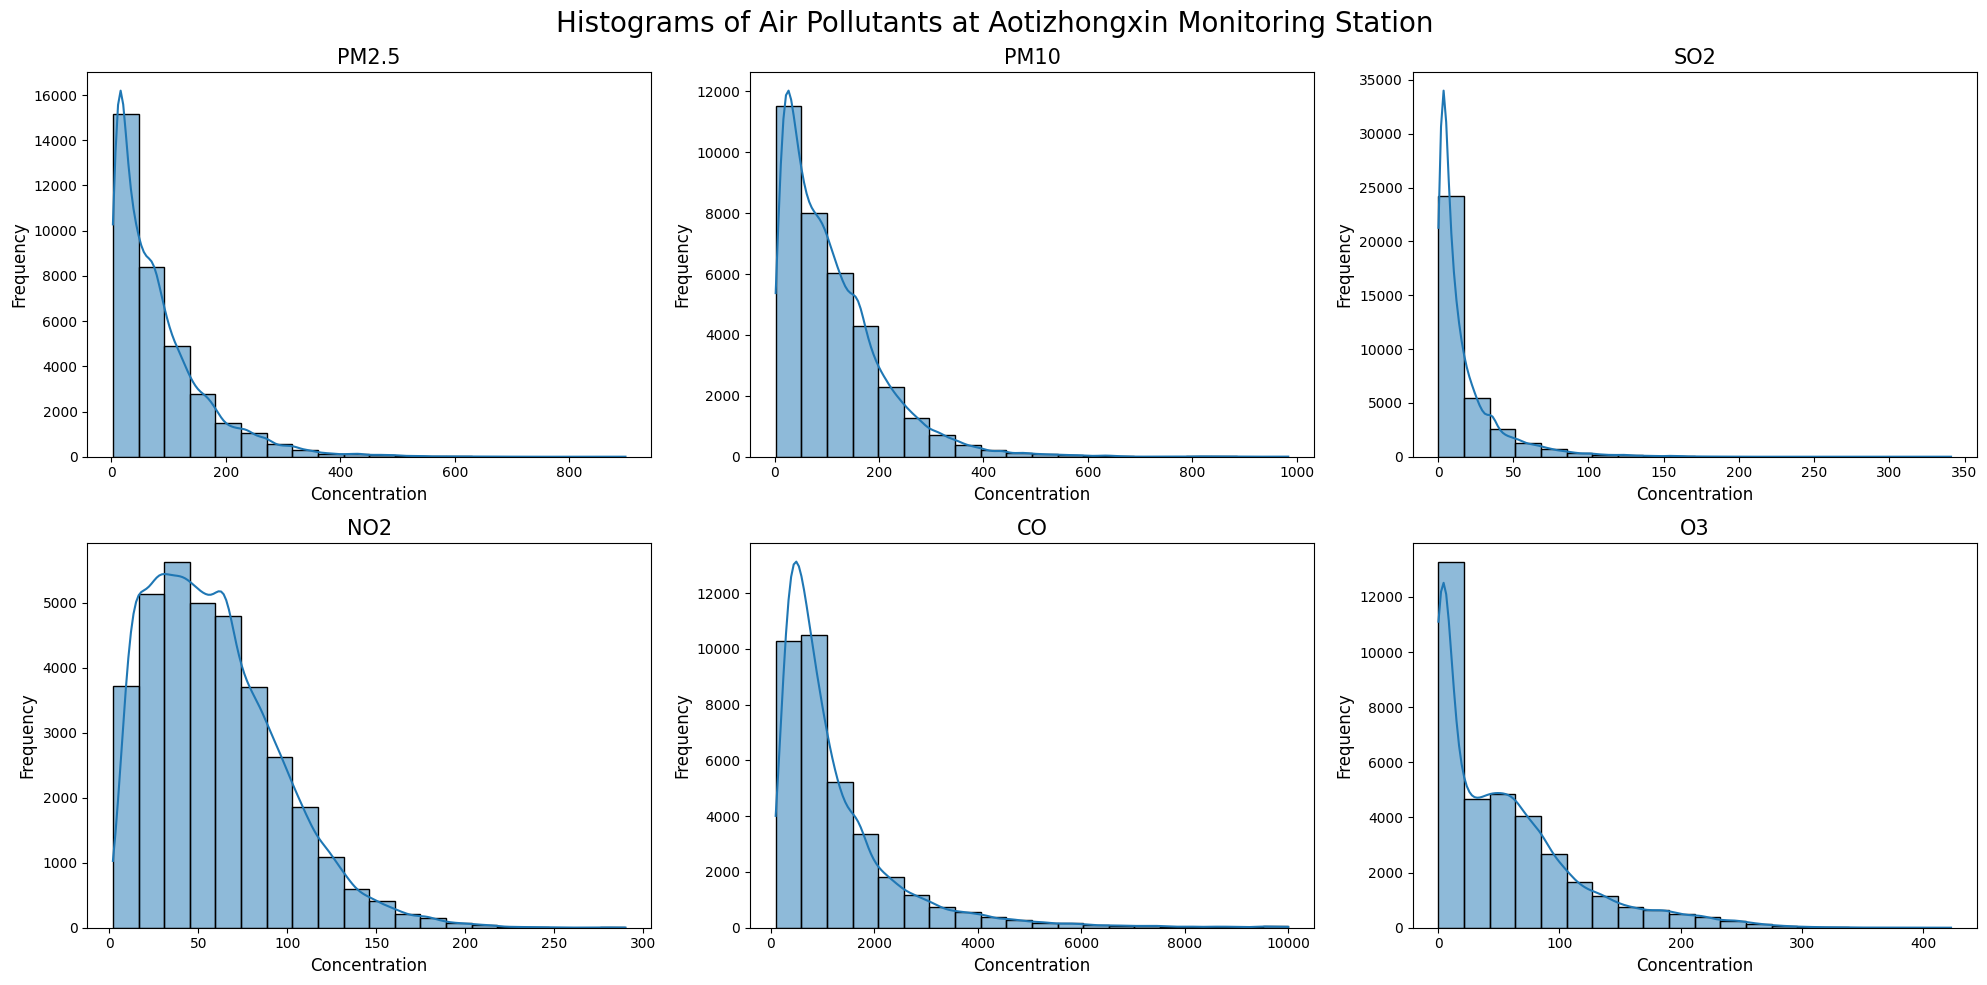

In [8]:
# plot a histogram of the air pollutants
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Histograms of Air Pollutants at Aotizhongxin Monitoring Station', fontsize=20)
for i, ax in enumerate(axes.flatten()):
    if i < len(pollutants):
        sns.histplot(Aotizhongxin_clean_ts[pollutants[i]], bins=20, kde=True, edgecolor='black', ax=ax)
        ax.set_title(f'{pollutants[i]}', fontsize=15)
        ax.set_xlabel('Concentration', fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Each histogram shows the distribution of pollutant concentrations over time at otizhongxin station

Key Observations:  

1. PM2.5 & PM10
   - Both exhibit a right-skewed distribution, meaning most observations have low concentrations, but there are occasional high pollution events.
   - PM2.5 tends to have a higher frequency of low concentrations, while PM10 has a slightly wider spread.
2. SO2
   - Highly right-skewed, indicating very low baseline concentrations with occasional spikes.
   - This suggests that sulfur dioxide pollution is mostly absent but can peak significantly during certain events (e.g., industrial activity, fuel combustion).
3. NO2
   - This histogram has a more balanced distribution compared to other pollutants.
   - The data suggests that NO2 levels fluctuate more consistently, likely due to continuous sources such as vehicular emissions and industrial activities.
4. CO
   - Strong right-skewed distribution, indicating most values are low but some high-concentration events occur.
   - The presence of extreme values suggests pollution sources like traffic congestion and industrial processes.
5. O3
   - The heavily right skewed distribution suggests low ozone levels most of the time, with occasional high peaks.
   - Ozone pollution is influenced by sunlight and temperature, meaning seasonal effects may play a role.
General Insights:
- Right-skewed distributions across most pollutants suggest occasional high-pollution episodes rather than constant high levels.
- Pollutants like NO₂ show a more balanced distribution, likely due to persistent sources such as vehicle emissions.

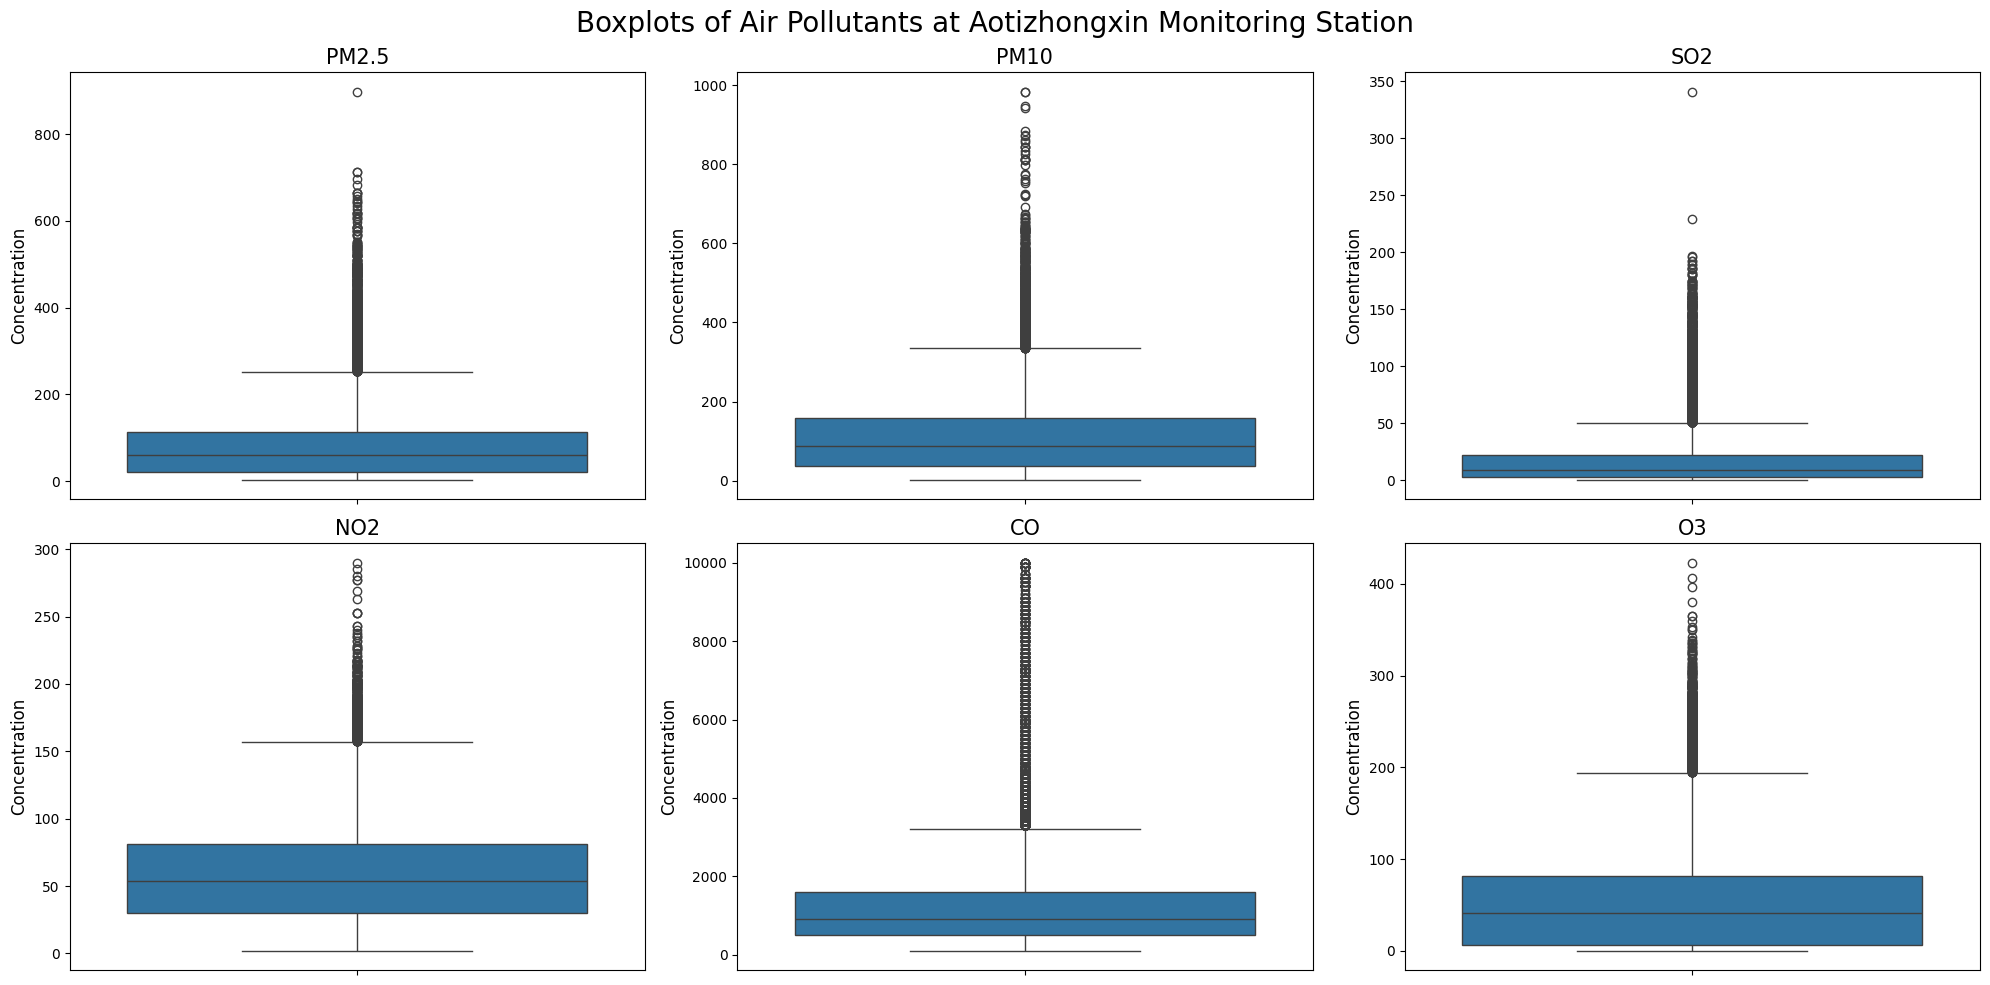

In [9]:
# Create a boxplot of the air pollutants
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Boxplots of Air Pollutants at Aotizhongxin Monitoring Station', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    if i < len(pollutants):
        sns.boxplot(y=Aotizhongxin_clean_ts[pollutants[i]], ax=ax)
        ax.set_title(f'{pollutants[i]}', fontsize=15)
        ax.set_ylabel('Concentration', fontsize=12)

plt.tight_layout()
plt.show()

1. PM2.5
- Median concentration of PM2.5 is relatively low, indicating that for most of the time, PM2.5 levels remain moderate.
- Interquartile Range (IQR) shows that a significant portion of observations falls within a reasonable range.
- Numerous extreme outliers, suggesting frequent pollution spikes.
- The upper whisker extends significantly, showing high variability in pollution levels.
- Implication: The presence of frequent extreme values suggests episodic pollution events, possibly from industrial activities, traffic, or weather conditions like temperature inversions.
2. PM10
- Median & IQR Similar to PM2.5, PM10 shows a right-skewed distribution, meaning a majority of observations are in the lower range, but some periods have significantly higher values.
- A very high number of outliers suggests frequent exceedances of standard air quality thresholds.
- Implication: PM10 primarily comes from dust, road transport, and industrial emissions. The frequent spikes indicate that the station might be near construction sites or major roads.
3. SO2
- The majority of SO2 concentrations are low, with most values clustered near zero.
- Despite generally low levels, extreme outliers exist, indicating occasional high pollution events maybe from industrial releases or fuel burning in winter.
- Implication: SO2 is typically emitted from coal combustion, industrial activities, and power plants. 
4. NO2
- NO2 levels have a relatively higher median compared to SO2, indicating consistently moderate pollution.
- The spread is relatively large, with multiple high-value outliers.
- Implication: NO2 is a key pollutant from vehicle emissions and industrial sources. Its moderate but persistent levels suggest continuous emission from traffic, while the outliers could be due to rush-hour peaks or temperature inversions trapping pollutants.
5. CO
- Moderate median value, meaning CO pollution is usually within expected levels.
- A high number of extreme outliers suggest pollution events with very high CO concentrations.
- Implication: CO is primarily emitted from incomplete combustion in vehicles, biomass burning, and industrial activities. The extreme spikes might be caused by traffic congestion, heating fuel combustion, or accidental industrial emissions.
6. O3
- The median ozone concentration is relatively low.
- The spread is moderate, but significant outliers exist.
- Implication: Unlike other pollutants, O3 is not directly emitted but forms due to sunlight-driven reactions with nitrogen oxides and volatile organic compounds. The outliers likely occur during hot, sunny days, when photochemical reactions drive ozone formation.

Overall
1. PM2.5, PM10, and CO have the highest number of outliers, indicating frequent pollution spikes.
2. NO2 and SO2 show moderate pollution with occasional extreme values, likely tied to specific events like rush-hour traffic or industrial emissions.
3. O3 has outliers likely influenced by weather conditions, particularly in summer months.
4. High outlier frequency indicates an unstable air quality pattern, meaning pollution is not constant but occurs in sudden bursts.

#### 4.1.3 Summary Statistics of Meteorological Data

In [10]:
# Define the metereological data
metereologicals = ['TEMP', 'PRES', 'DEWP','RAIN','WSPM','wd_direction']

met_stats_summary = Aotizhongxin_clean_ts[metereologicals].describe()
print(f"Summary Statistics for Environmental factors at Aotizhongxin weather station \n")
print(met_stats_summary)

Summary Statistics for Environmental factors at Aotizhongxin weather station 

               TEMP          PRES          DEWP          RAIN          WSPM  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      13.581908   1011.851716      3.120283      0.067383      1.708470   
std       11.400761     10.404909     13.690615      0.909798      1.204171   
min      -16.800000    985.900000    -35.300000      0.000000      0.000000   
25%        3.100000   1003.300000     -8.100000      0.000000      0.900000   
50%       14.500000   1011.400000      3.800000      0.000000      1.400000   
75%       23.300000   1020.100000     15.600000      0.000000      2.200000   
max       40.500000   1042.000000     28.500000     72.500000     11.200000   

       wd_direction  
count  35064.000000  
mean     144.250513  
std      103.296269  
min        0.000000  
25%       45.000000  
50%      112.500000  
75%      225.000000  
max      337.500000  


Summary statistics of key weather parameters at the Aotizhongxin station over 35,064 recorded observations. 

1. Temperature (TEMP)
- Mean: 13.58°C → Moderate average temperature.
- Standard Deviation: 11.40°C → Large seasonal variation.
- Min - Max: -16.8°C to 40.5°C → Extreme cold and hot conditions recorded.
- Median: 14.5°C → Most of the time, temperatures are in the moderate range.
- Conclusion: The location experiences significant seasonal temperature fluctuations.

2. Pressure (PRES) 
- Mean: 1011.85 hPa → Close to the standard atmospheric pressure (~1013 hPa).
- Standard Deviation: 10.40 hPa → Small variations.
- Min - Max: 985.9 - 1042 hPa → Occasionally lower pressures, possibly linked to weather systems like storms.
- Median: 1011.4 hPa → The middle value aligns closely with the mean.
- Conclusion: Pressure remains relatively stable, with occasional weather system influences.

3. Dew Point (DEWP)
- Mean: 3.12°C → Cool and dry conditions are common.
- Standard Deviation: 13.69°C → Large fluctuations, indicating seasonal moisture variations.
- Min - Max: -35.3°C to 28.5°C → Extreme dry/cold and humid conditions occur.
- Median: 3.8°C → The distribution is slightly skewed towards positive values.
- Conclusion: Significant seasonal shifts between dry winters and humid summers.

4. Rainfall (RAIN)
- Mean: 0.067 mm → Very little rainfall on average.
- Standard Deviation: 0.91 mm → Some variability, but most values are low.
- Min - Max: 0 - 72.5 mm → Rare but heavy rainfall events occur.
- Percentiles (25%, 50%, 75%): 0 mm → Most days recorded no rainfall.
- Conclusion: The area experiences dry conditions with occasional heavy rainfall.

5. Wind Speed (WSPM) 
- Mean: 1.71 m/s → Generally light winds.
- Standard Deviation: 1.20 m/s → Some variability.
- Min - Max: 0 - 11.2 m/s → Calm days (0 m/s) to occasional strong winds.
- Median: 1.4 m/s → Most of the time, wind speed remains low
- Conclusion: Light winds dominate, but occasional strong gusts occur.

6. Wind Direction (wd_direction)
- Mean: 144.25° → Winds predominantly come from the southeast (90°-180°).
- Standard Deviation: 103.30° → Large variation, meaning winds shift direction often.
- Min - Max: 0° - 337.5° → Covers all possible wind directions.
- Median: 112.5° → Winds are mostly from the east-southeast.
- Conclusion: The region experiences variable wind directions, with a predominant southeast wind.

Final Insights
- Large seasonal variations in temperature and dew point.
- Mostly dry conditions, with rare heavy rainfall events.
- Pressure remains stable, with minor variations.
- Light winds dominate, but occasional strong gusts occur.
- Wind direction is variable, but predominantly from the southeast.

#### 4.1.4 Distribution of Meteorological Data

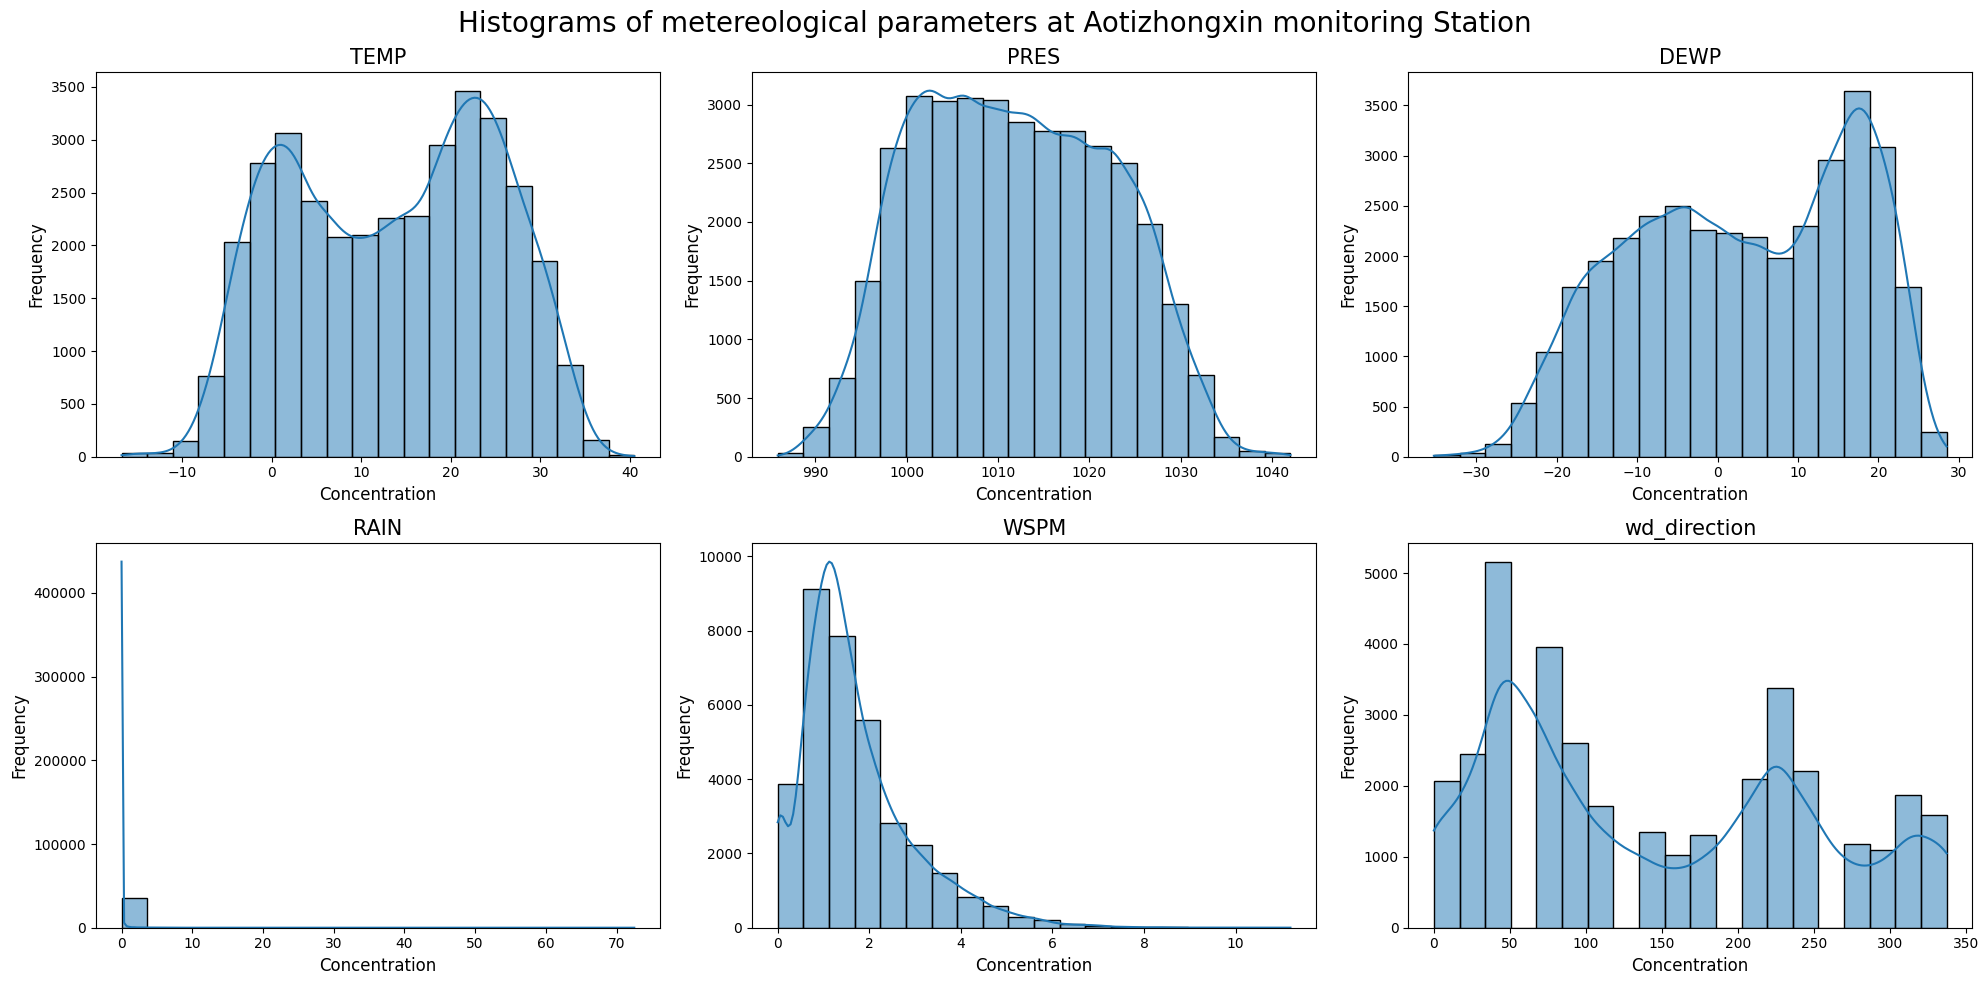

In [11]:
# plot a histogram of the metereological parameters
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Histograms of metereological parameters at Aotizhongxin monitoring Station', fontsize=20)
for i, ax in enumerate(axes.flatten()):
    if i < len(metereologicals):
        sns.histplot(Aotizhongxin_clean_ts[metereologicals[i]], bins=20, kde=True, edgecolor='black', ax=ax)
        ax.set_title(f'{metereologicals[i]}', fontsize=15)
        ax.set_xlabel('Concentration', fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

1. TEMP (Temperature)
- **Bimodal distribution**: The histogram shows two peaks, indicating that there may be two distinct seasons or temperature regimes.
- **Range**: Approximately from -10°C to 35°C.
- **Skewness**: The distribution appears relatively symmetrical, suggesting a natural seasonal variation in temperature.
2. PRES (Pressure)
- **Slightly right-skewed distribution**: Most pressure values are clustered around 1000-1025 hPa, with a gradual decrease towards higher values.
- **Range**: Between 990 hPa and 1040 hPa.
- **Interpretation**: This is a typical distribution for atmospheric pressure in a stable weather system, with slight variations due to changing weather conditions.
3. DEWP (Dew Point)
- **Bimodal distribution**: Indicates two common dew point regimes, possibly due to seasonal variations.
- **Range**: From about -30°C to 25°C.
- **Interpretation**: Dew point values reflect humidity and temperature changes. The two peaks may correspond to summer and winter conditions.
4. RAIN (Rainfall)
- **Highly skewed distribution**: Most values are concentrated at **zero**, indicating that rainfall events are rare, with occasional extreme values.
- **Range**: Mostly 0 mm, with a few outliers reaching up to 70 mm.
- **Interpretation**: The data suggests that the region experiences long dry periods with occasional heavy rainfall.
5. WSPM (Wind Speed)
- **Right-skewed distribution**: Most wind speeds are low, with a gradual decrease in frequency for higher wind speeds.
- **Range**: From 0 to around 10 m/s.
- **Interpretation**: This suggests that calm or light winds dominate in this location, with stronger winds occurring less frequently.
6. wd_direction (Wind Direction)
- **Multimodal distribution**: Peaks at different wind directions suggest dominant wind patterns.
- **Range**: Covers 0° to 360°, representing all possible wind directions.
- **Interpretation**: This indicates that the wind comes from multiple predominant directions, possibly due to seasonal shifts in atmospheric circulation.

Overall
1. **Temperature and Dew Point**: Show seasonal variations with bimodal distributions.
2. **Pressure**: Generally stable with small fluctuations.
3. **Rainfall**: Rare but sometimes extreme.
4. **Wind Speed**: Mostly calm, with occasional stronger winds.
5. **Wind Direction**: Multiple dominant directions, indicating varying weather patterns.

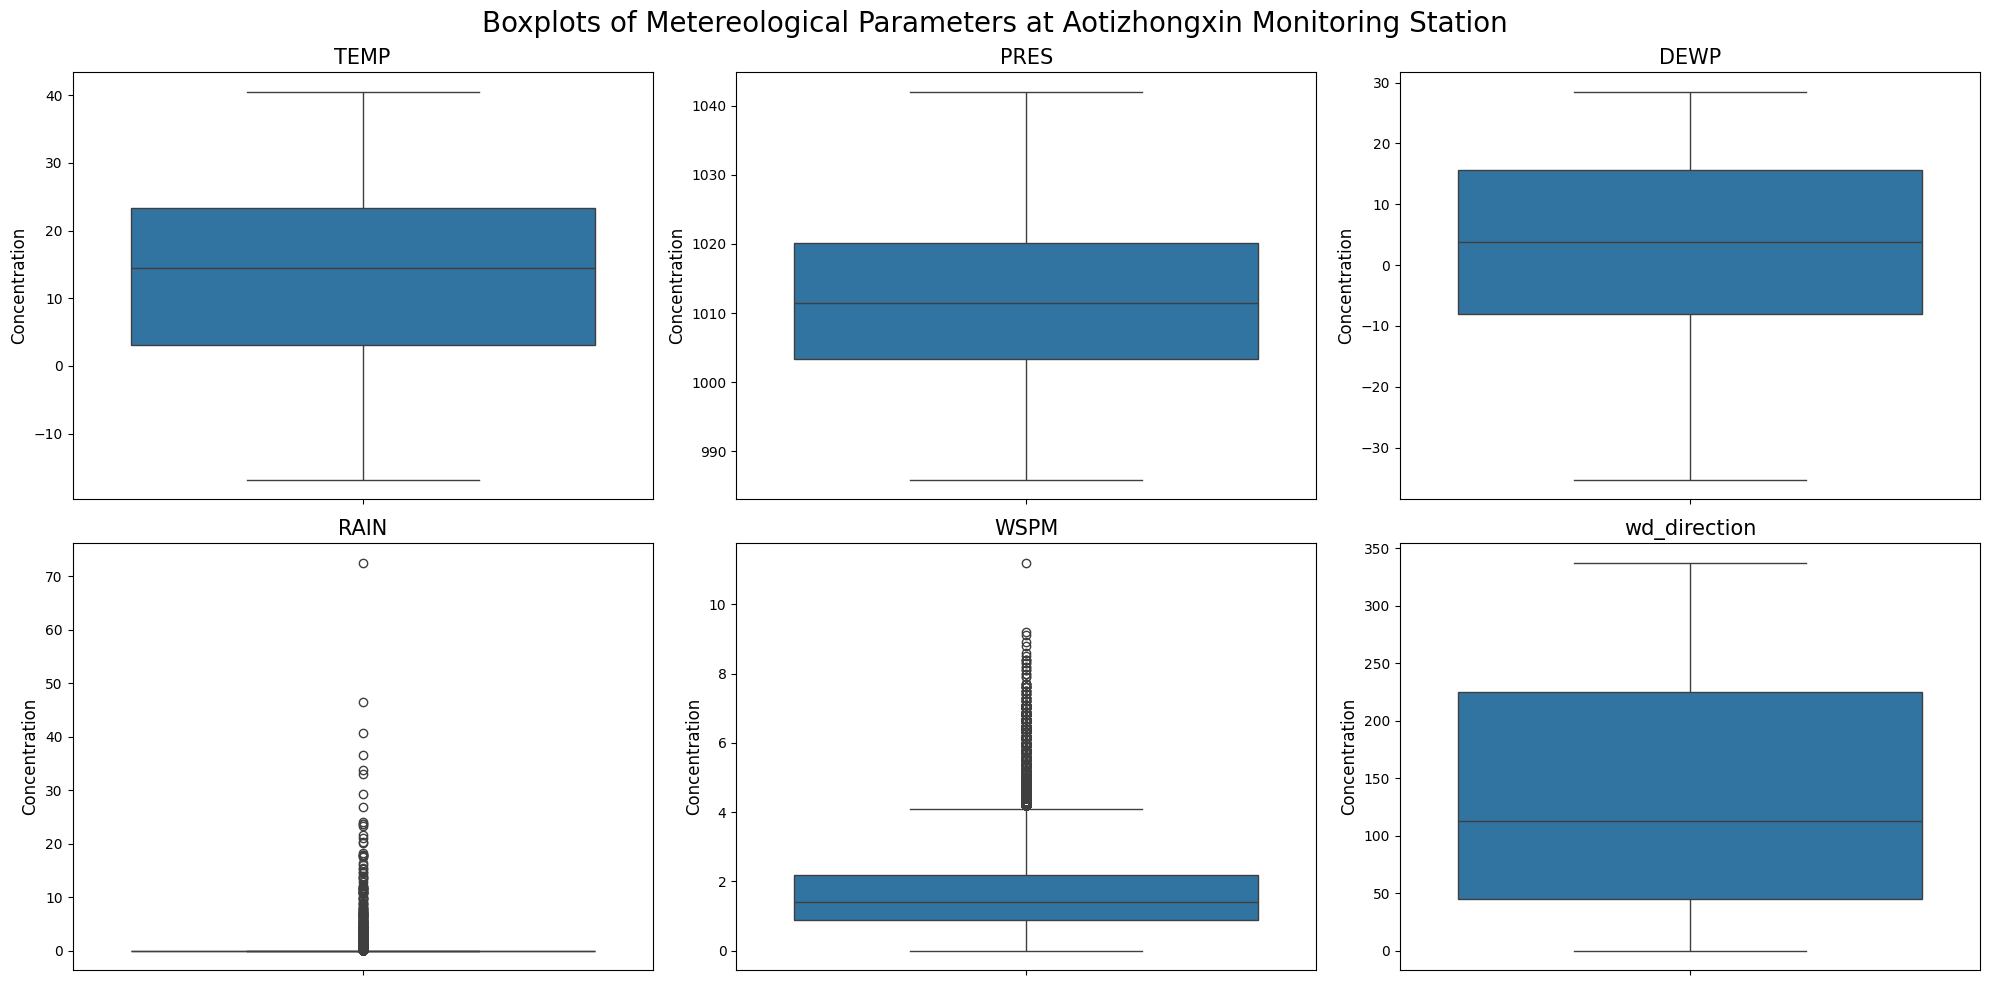

In [12]:
# Create a boxplot of the air pollutants
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle('Boxplots of Metereological Parameters at Aotizhongxin Monitoring Station', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    if i < len(metereologicals):
        sns.boxplot(y=Aotizhongxin_clean_ts[metereologicals[i]], ax=ax)
        ax.set_title(f'{metereologicals[i]}', fontsize=15)
        ax.set_ylabel('Concentration', fontsize=12)

plt.tight_layout()
plt.show()

The boxplots provide visualization of data distribution, central tendency, and outliers for different meteorological parameters at the Aotizhongxin Monitoring Station.
1. TEMP (Temperature)
- **Median**: Around 15°C.
- **Interquartile Range (IQR)**: Approximately from 5°C to 25°C.
- **Outliers**: None detected.
- **Interpretation**: The temperature values are well distributed, with no extreme variations.
2. PRES (Pressure)
- **Median**: Around 1010 hPa.
- **IQR**: Between 1000 hPa and 1025 hPa.
- **Outliers**: No significant outliers.
- **Interpretation**: Atmospheric pressure is relatively stable, with a few variations but no extreme values.
3. DEWP (Dew Point)
- **Median**: Close to 5°C.
- **IQR**: From about -10°C to 15°C.
- **Outliers**: No significant outliers.
- **Interpretation**: Dew point values are evenly spread, following expected variations with temperature.
4. RAIN (Rainfall)
- **Median**: Near **zero** (indicating most days have no rainfall).
- **Outliers**: Numerous outliers above 10 mm, with extreme values reaching around 70 mm.
- **Interpretation**: The presence of many outliers suggests that rainfall is infrequent but can be heavy when it does occur.
5. WSPM (Wind Speed)
- **Median**: Close to **1.5 m/s**.
- **IQR**: Mostly below 3 m/s.
- **Outliers**: Many values beyond 5 m/s, reaching up to 10 m/s.
- **Interpretation**: Most wind speeds are low, but occasional high-wind events occur.
6. wd_direction (Wind Direction)
- **Median**: Around **120°**.
- **IQR**: Between **50° and 250°**.
- **Outliers**: No extreme outliers.
- **Interpretation**: Wind direction in degress is widely spread, suggesting that wind comes from multiple directions rather than a single dominant source.

Overall
- **Rainfall and wind speed have significant outliers**, indicating extreme weather events.
- **Temperature, pressure, and dew point** exhibit a stable distribution without extreme variations.
- **Wind direction shows a wide spread**, confirming variability in prevailing winds.

#### 4.1.5. Descriptive Statistics of wind direction (categorical variable)

In [13]:
# display the number and proportion of observations for each wind direction
wd_summary = Aotizhongxin_clean_ts['wd'].value_counts() # number of observations per wind direction.
wd_percentage = Aotizhongxin_clean_ts['wd'].value_counts(normalize=True) * 100 # proportion of observations per wind direction in percentage.

wd_summary_df = pd.DataFrame({'Count': wd_summary, 'Percentage': wd_percentage.round(2)}) # create a DataFrame to display the summary statistics.
print(f'Number and Proportion of observations per wind direction:\n{wd_summary_df}')

Number and Proportion of observations per wind direction:
     Count  Percentage
wd                    
NE    5161       14.72
ENE   3956       11.28
SW    3384        9.65
E     2611        7.45
NNE   2446        6.98
WSW   2213        6.31
SSW   2099        5.99
N     2069        5.90
NW    1865        5.32
ESE   1719        4.90
NNW   1589        4.53
SE    1349        3.85
S     1304        3.72
W     1175        3.35
WNW   1102        3.14
SSE   1022        2.91


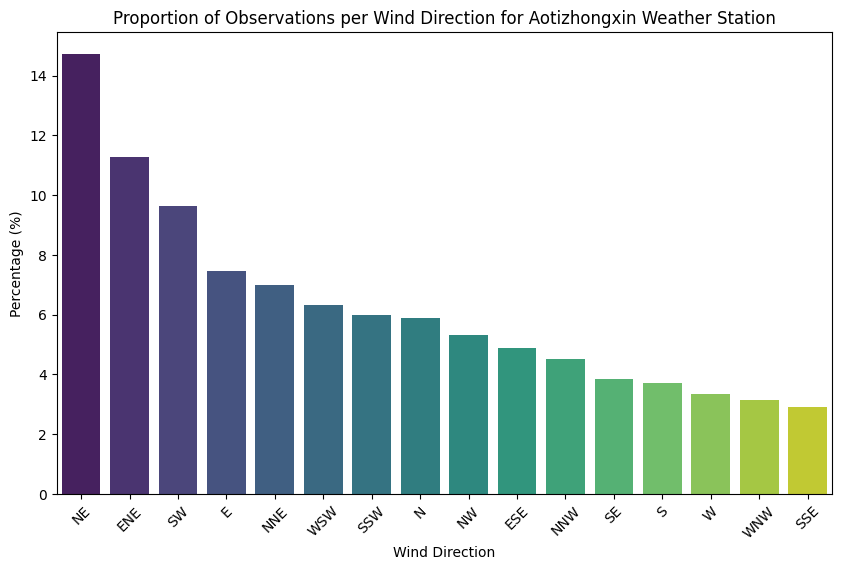

In [14]:
# Sort by count for better visualization
wd_summary_df = wd_summary_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=wd_summary_df.index.tolist(), y=wd_summary_df['Percentage'], hue=wd_summary_df.index.tolist(), palette='viridis', legend=False)

plt.xlabel('Wind Direction')
plt.ylabel('Percentage (%)')
plt.title('Proportion of Observations per Wind Direction for Aotizhongxin Weather Station')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The bar plot shows the proportion of observations for each wind direction at the **Aotizhongxin Weather Station**. 

From the barplot and the value count for wind direction, the following are noted:
**Key Observations:**
1. **Dominant Wind Directions:**  
   - The most common wind direction is **NE (Northeast)** with the highest percentage (14.72%). This indicates that winds most commonly come from this direction.
   - Other frequently observed directions include **ENE (East-Northeast) and SW (Southwest).**  
   - These three directions alone account for over 35% of all observations, suggesting a prevailing wind pattern in these directions.
2. **Less Frequent Wind Directions:**  
   - **SSE (South-Southeast), WNW (West-Northwest), and W (West)** have the lowest proportions, all under 3.5%.  
3. **General Trend:**  
   - The wind distribution is somewhat skewed, with a few directions occurring more frequently.  
   - The variation in wind directions suggests diverse wind patterns in this location.

### 4.2. Trend analysis of air pollutants

#### 4.2.1 Hourly trends over time

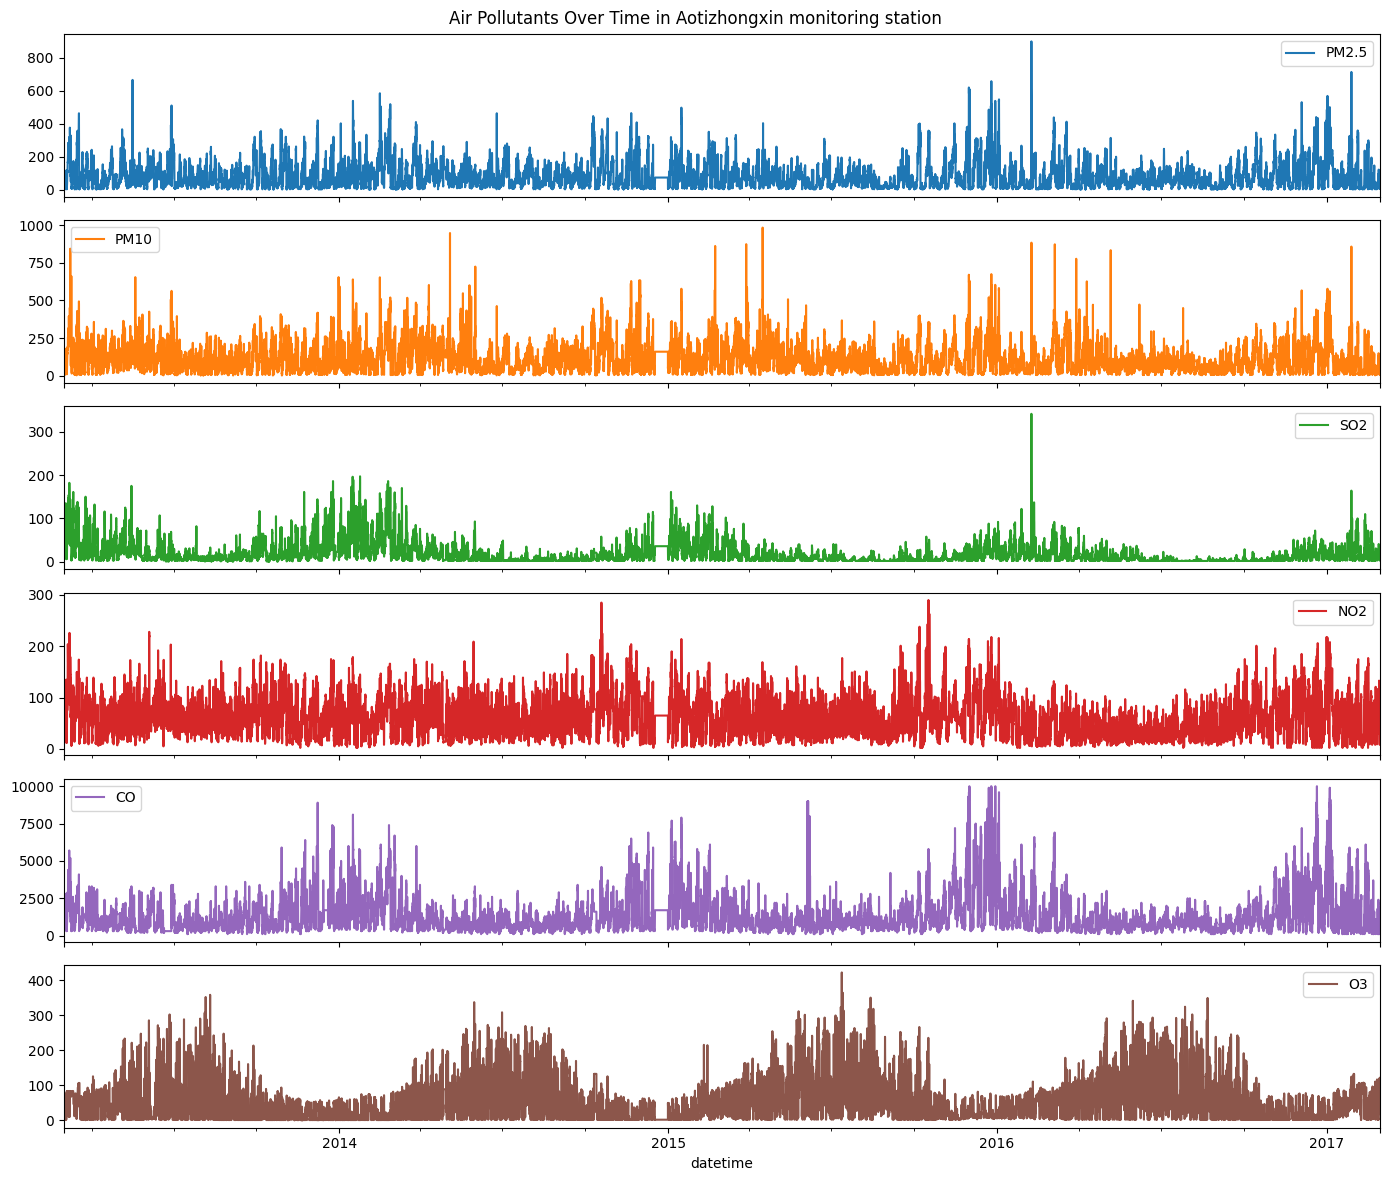

In [15]:
# plot the air pollutants over time
# Define the pollutants
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Create subplots
Aotizhongxin_clean_ts[pollutants].plot(
    subplots=True, 
    layout=(6,1), 
    figsize=(14,12), 
    sharex=True, # Ensures all plots share the same x-axis (time).
    title= f"Air Pollutants Over Time in Aotizhongxin monitoring station")

# Adjust layout
plt.tight_layout()
plt.show()

**Interpretation of Air Pollutants Over Time in Aotizhongxin Station**

The time-series plot displays the variation in air pollutant concentrations from **2013 to 2017** at the **Aotizhongxin weather station**. Each subplot represents a different pollutant:

1. **PM2.5 (Blue)**
   - Fluctuates significantly over time, with **frequent spikes above 200 µg/m³**.
   - Peaks suggest periodic high pollution events (e.g., winter seasons or industrial activity).
   
2. **PM10 (Orange)**
   - Shows a similar trend to **PM2.5**, but with larger fluctuations.
   - Multiple peaks exceeding **750 µg/m³**, indicating severe air pollution events.
   
3. **SO2 (Green)**
   - Generally lower values, with most concentrations **below 100 µg/m³**.
   - Occasional spikes, possibly linked to local emissions or seasonal effects.
   
4. **NO2 (Red)**
   - More stable compared to **PM2.5 and PM10**, but still **highly variable**.
   - Peaks align with **winter months**, likely due to increased heating and vehicle emissions.
   
5. **CO (Purple)**
   - Follows a distinct seasonal pattern, with **higher values in winter**.
   - Spikes exceeding **5000 µg/m³**, indicating periods of poor air quality.
   
6. **O3 (Brown)**
   - Opposite trend to **CO**—higher in summer and lower in winter.
   - Peaks above **300 µg/m³**, likely due to increased sunlight-driven ozone formation.

**Key Observations**
- **Seasonal Trends:** Pollutants like **CO, NO2, and PM2.5** are higher in winter, likely due to heating and stagnant air conditions. **O3 peaks in summer**, driven by photochemical reactions.
- **Periodic Spikes:** Large pollution events occur at different times, possibly due to meteorological factors (e.g., wind, temperature inversions).
- **PM10 & PM2.5 Correlation:** Their trends are closely aligned, indicating common sources (e.g., vehicular emissions, industrial activities).

#### 6.2.2. Daily Trends

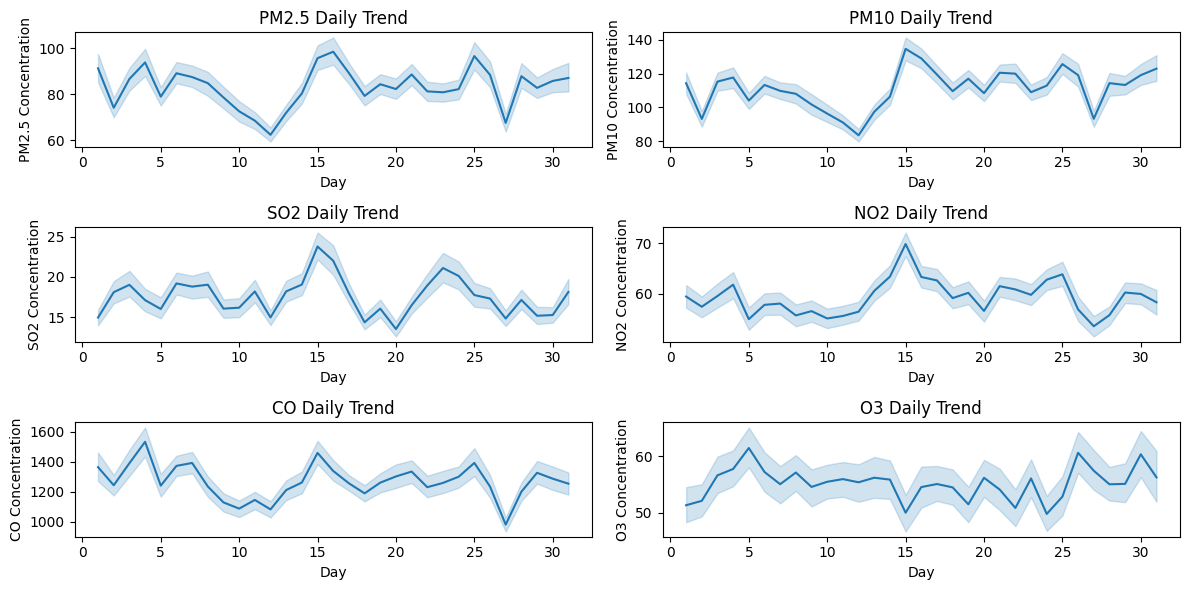

In [16]:
# Daily Trend Analysis
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.lineplot(x=Aotizhongxin_clean_ts["day"], y=Aotizhongxin_clean_ts[pollutant])
    plt.title(f"{pollutant} Daily Trend")
    plt.xlabel("Day")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

The plots display daily trends of six key air pollutants over a month, with a solid line representing the mean concentration and a shaded region indicating variability.
1. PM2.5 (Fine Particulate Matter)
- Trend: Fluctuates significantly, with a drop around day 12
- Peaks: Around day 3, 16, and 25.
- Interpretation: PM2.5 shows periodic spikes, likely due to meteorological changes or pollution sources like traffic and industry.
2. PM10 (Coarse Particulate Matter)
- Trend: Similar to PM2.5, showing synchronized dips and peaks.
- Lowest Point: Around day 12.
- Interpretation: PM10 and PM2.5 are often correlated, suggesting common emission sources.
3. SO2 (Sulfur Dioxide)
- Trend: Gradual increase with periodic fluctuations.
- Peak: Around day 15 and 25.
- Interpretation: SO2 is mainly from fossil fuel combustion (industrial activities), and its peaks may correspond to increased energy demand.
4. NO2 (Nitrogen Dioxide)
- Trend: Noticeable peak at day 15, followed by fluctuations.
- Interpretation: NO2 is linked to vehicle emissions and industrial sources. High values may indicate traffic congestion or fuel combustion patterns.
5. CO (Carbon Monoxide)
- Trend: Sharp peak around day 4 and 15, then a gradual decrease.
- Interpretation: CO is often associated with incomplete combustion. Its peak could be due to traffic congestion or specific weather conditions trapping pollutants.
6. O3 (Ozone)
- Trend: Gradual increase with peak levels at days 5, 26 and 30.
- Dip: Day 15, around day 20, 22 & 24. 
- Interpretation: Ozone formation depends on sunlight and precursor pollutants (NOx and VOCs). The trend suggests photochemical reactions increasing O3 levels.

Overall
- PM2.5 and PM10 follow similar trends, suggesting shared pollution sources.
- SO2, NO2, and CO show mid-month peaks, possibly linked to industrial or vehicular activities.
- Ozone rises gradually, indicating photochemical formation.

#### 6.2.3 Monthly Trends

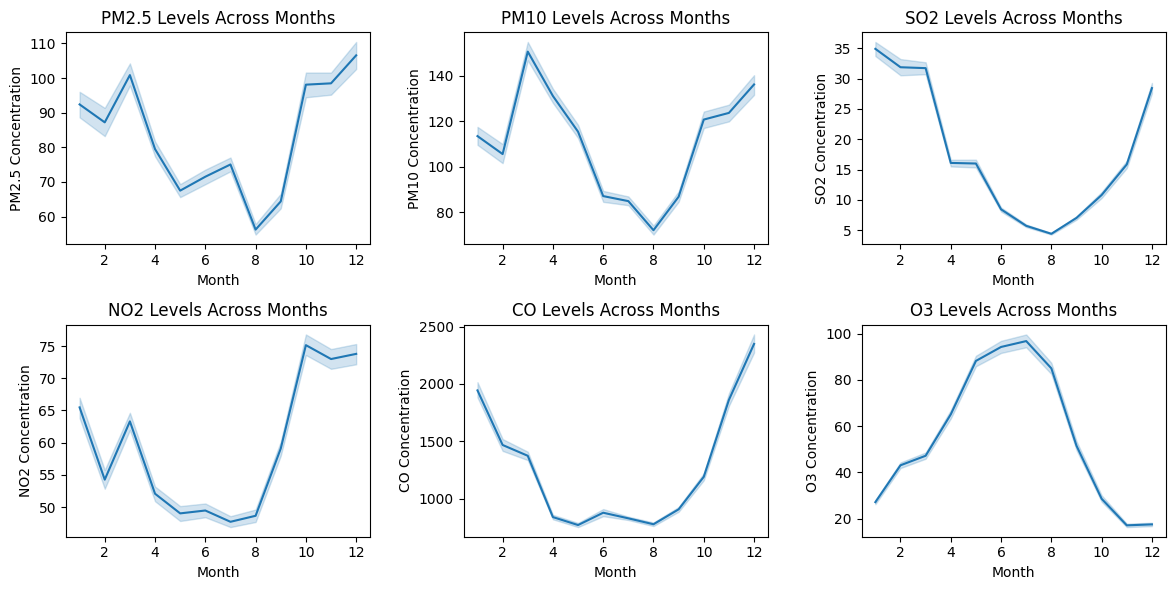

In [17]:
# Monthly Trend Analysis
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=Aotizhongxin_clean_ts["month"], y=Aotizhongxin_clean_ts[pollutant])
    plt.title(f"{pollutant} Levels Across Months")
    plt.xlabel("Month")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

Monthly Trends in Pollutant Levels (Aotizhongxin Station)

These plots illustrate the seasonal variations in pollutant concentrations over a typical year.

Key Observations:
1. PM2.5 & PM10 (Top-left & Top-middle)
   - Higher concentrations in winter (Dec-Jan) and spring (Mar-Apr).
   - Lowest levels during summer (June-Aug).
   - Likely influenced by heating activities in winter, dust storms in spring, and better dispersion in summer.

2. SO2 (Top-right)
   - Peak levels in winter (Dec-Feb), lowest in summer (Jun-Aug).
   - Strongly linked to coal combustion for heating.

3. NO2 (Bottom-left)
   - Sharp decline from winter to summer lowest in June-Aug.
   - Peaks again in December possibly due to increased vehicle emissions and heating-related activities.

4. CO (Bottom-middle)
   - Similar pattern to NO2 with high winter values and a summer drop.
   - Suggests a strong influence of combustion sources (vehicles, heating).

5. O3 (Bottom-right)
   - Opposite trend: peaks in summer (June-Aug) and declines in winter.
   - Ozone formation is driven by strong sunlight and photochemical reactions explaining higher levels in warm months.

Overall Insights:
- Winter months show high PM2.5, PM10, SO2, NO2, and CO levels likely due to heating, vehicle emissions, and poor atmospheric dispersion.
- Summer months have higher O3 levels driven by stronger sunlight and photochemistry.
- Spring and autumn act as transition periods between these extremes.

#### 6.2.4. Seasonal Trends

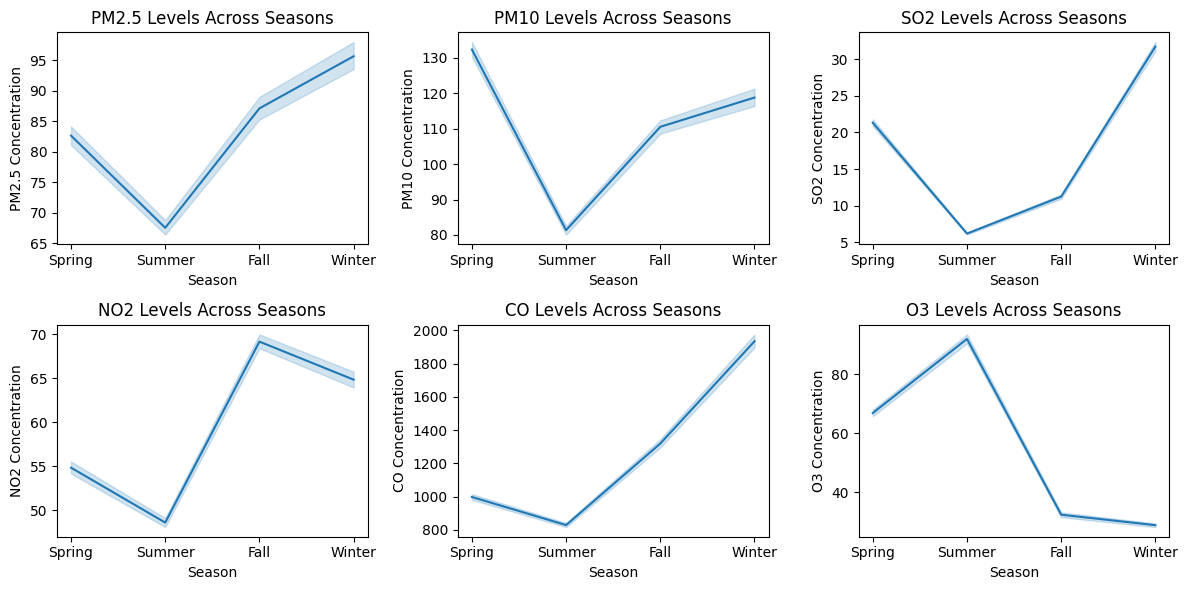

In [18]:
# Extract relevant time features
Aotizhongxin_clean_ts["season"] = Aotizhongxin_clean_ts["month"].map({12: "Winter", 1: "Winter", 2: "Winter",
                                3: "Spring", 4: "Spring", 5: "Spring",
                                6: "Summer", 7: "Summer", 8: "Summer",
                                9: "Fall", 10: "Fall", 11: "Fall"})

# Seasonal Line Plot Analysis
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=Aotizhongxin_clean_ts["season"], y=Aotizhongxin_clean_ts[pollutant])
    plt.title(f"{pollutant} Levels Across Seasons")
    plt.xlabel("Season")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

Observations:
1. PM2.5 & PM10 (Top-left & Top-middle)
   - Lowest levels in summer, highest in winter.
   - Likely influenced by winter heating emissions, stagnant air, and temperature inversions trapping pollutants.

2. SO2 & NO2 (Top-right & Bottom-left)
   - Lowest in summer, highest in winter.
   - SO2 increase in winter suggests higher fossil fuel combustion (coal, biomass burning).
   - NO2 is vehicle-related, and cold weather leads to higher concentrations due to less dispersion.

3. CO (Bottom-middle)
   - Lowest in summer, rising in fall and peaking in winter.
   - Indicates higher carbon monoxide emissions from heating and industrial activities in colder months.

4. O3 (Bottom-right)
   - Opposite trend to other pollutants—highest in summer, lowest in winter.
   - More sunlight in summer increases photochemical reactions that form ozone.
   - Less sunlight and lower temperatures in winter reduce ozone production.

Overall insights:
- Winter sees a significant rise in most pollutants due to heating emissions, stagnant air, and temperature inversions.
- Summer has the cleanest air except for ozone, which peaks due to stronger solar radiation.
- Seasonal variations align with meteorological influences on pollutant dispersion and chemical reactions.

#### 6.2.5. Yearly Trends

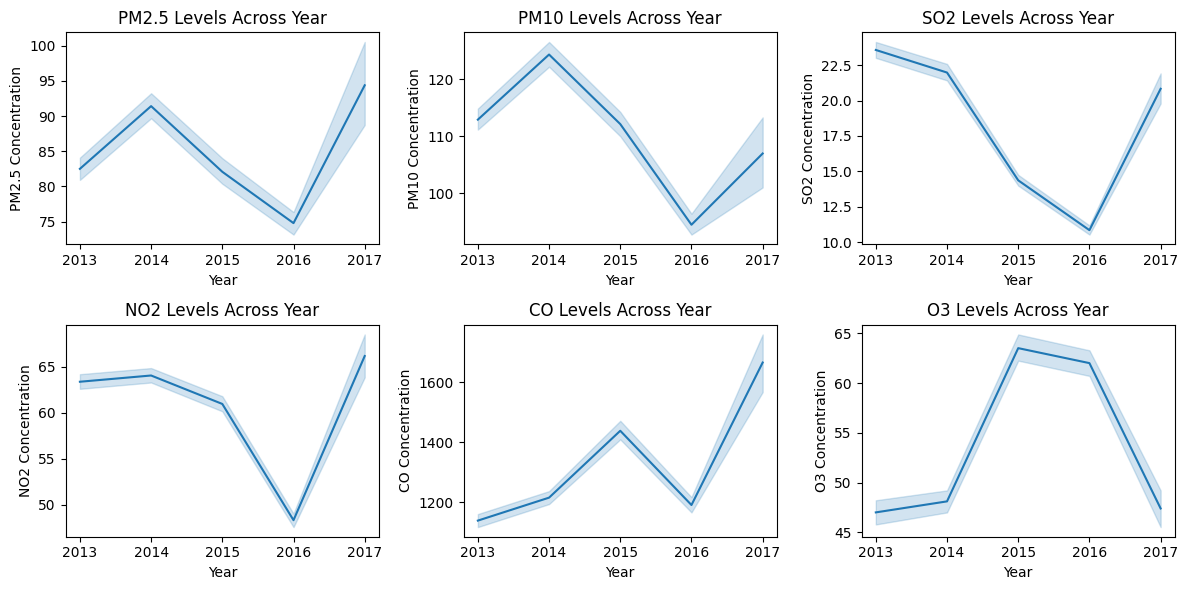

In [19]:
# Yearly Trends Analysis
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=Aotizhongxin_clean_ts["year"], y=Aotizhongxin_clean_ts[pollutant])
    plt.title(f"{pollutant} Levels Across Year")
    plt.xlabel("Year")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

Interpretation of Annual Trends in Pollutant Levels (Aotizhongxin Station)

The plots depict the average concentration trends of pollutants from 2013 to 2017 along with confidence intervals.

Key Observations:
1. PM2.5 & PM10 (Top-left & Top-middle)
   - Show an increase from 2013 to 2014 followed by a decline until 2016
   - A sharp rise in 2017 possibly due to changes in emissions, weather conditions, or policy shifts.

2. SO2 (Top-right)
   - A steady decline from 2013 to 2016 indicating improved air quality control measures (e.g., reduced coal burning).
   - However, a noticeable increase in 2017 which could be due to temporary changes in industrial activity or energy production.

3. NO2 (Bottom-left)
   - Relatively stable until 2015 followed by a decline in 2016.
   - A sharp increase in 2017 suggesting a rise in traffic emissions or industrial sources.

4. CO (Bottom-middle)
   - A general upward trend from 2013 to 2015 indicating worsening air quality.
   - A decline in 2016 followed by a sharp increase in 2017 possibly linked to heating needs in winter or industrial activity.

5. O3 (Bottom-right)
   - Steady increase from 2013 to 2015 peaking in 2015.
   - Declines slightly in 2016 and drops significantly in 2017.
   - This aligns with ozone formation being higher in summer and possibly affected by changes in precursor pollutants (e.g., NO2 and VOCs).

Possible Explanations for Trends:
- 2013-2016: Possible implementation of stricter air pollution controls, reducing SO2, NO2, and PM concentrations.
- 2017 Increase: Suggests a resurgence in pollution sources possibly due to economic or industrial activity changes.

### 4.3. Distribution of pollutants over time

#### 4.3.1 Hourly Distribution of Air Pollutants

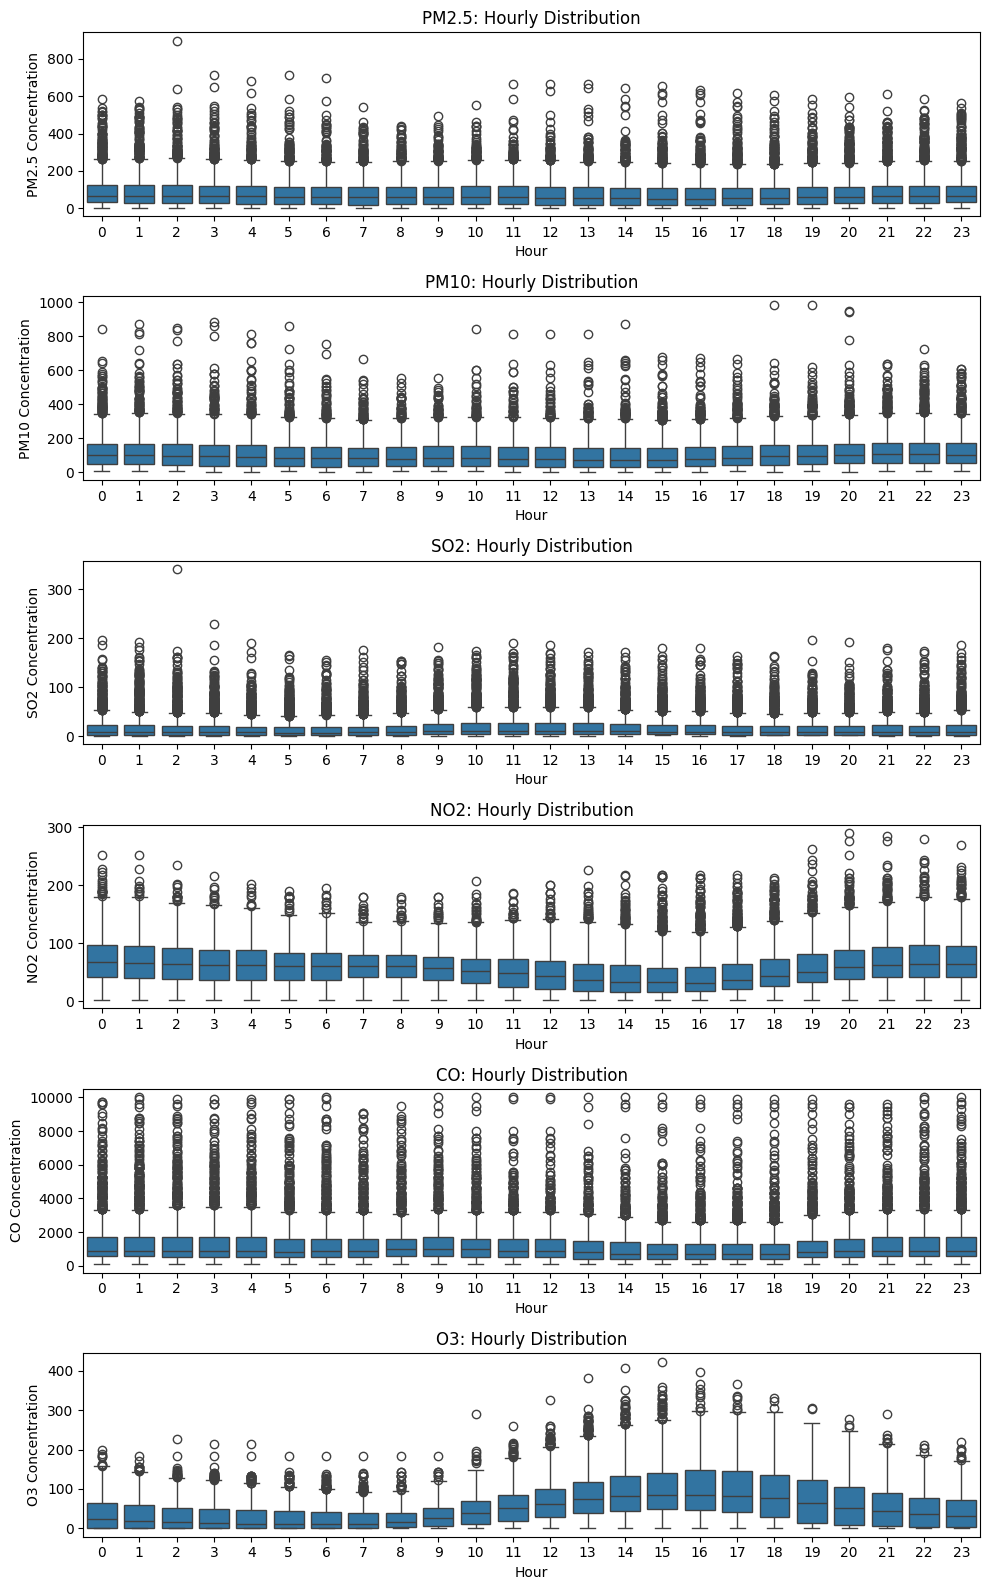

In [20]:
# Hourly distribution of pollutants
plt.figure(figsize=(10, 16))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(6, 1, i)
    sns.boxplot(x=Aotizhongxin_clean_ts["hour"], y=Aotizhongxin_clean_ts[pollutant])
    plt.title(f"{pollutant}: Hourly Distribution")
    plt.xlabel("Hour")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

1. PM2.5 (Fine Particulate Matter)
- Observation: PM2.5 levels appear relatively stable.
- Peak Hours: 19:00 - 23:00. Hours with low Levels: 15:00 - 16:00
2. PM10 (Coarse Particulate Matter)
- Observation: Follows a similar pattern to PM2.5, with slightly elevated levels during the day.
- Peak Hours: 18:00 - 23.00. Hours with low Levels: 13:00 - 15:00
3. SO2 (Sulfur Dioxide)
- Peak Hours: 09:00 - 14.00 & 15:00 - 23:00. Hours with low Levels: 05:00 - 18:00.
- Alot of outliers for each hour of the day. 
4. NO2 (Nitrogen Dioxide)
- Peak Hours: 21:00 - 00:00. Hours with low Levels: 14:00 - 16:00. 
- Observation: NO2 levels show a clear increase in the evening to night time and very early morning hours. Low levels in the afternoon.
5. CO (Carbon Monoxide)
- Peak Hours: 00:00 - 04:00 & 08:00 - 10:00. Hours with low Levels: 14:00 - 18:00. 
- Observation: CO levels remain high throughout the day but peak in the morning, evening to night time hours. 
- Interpretation: Suggests major sources are traffic congestion and fuel combustion.
6. O3 (Ozone)
- Peak Hours: 15:00 - 16:00. Hours with low Levels: 04:00 - 05:00
- Observation: Unlike other pollutants, O3 levels are lowest in the morning and rise during the afternoon.
- Interpretation: Ozone is a secondary pollutant formed by photochemical reactions, which explains its rise during peak sunlight hours.

#### 4.3.2. Daily Distribution of Pollutants

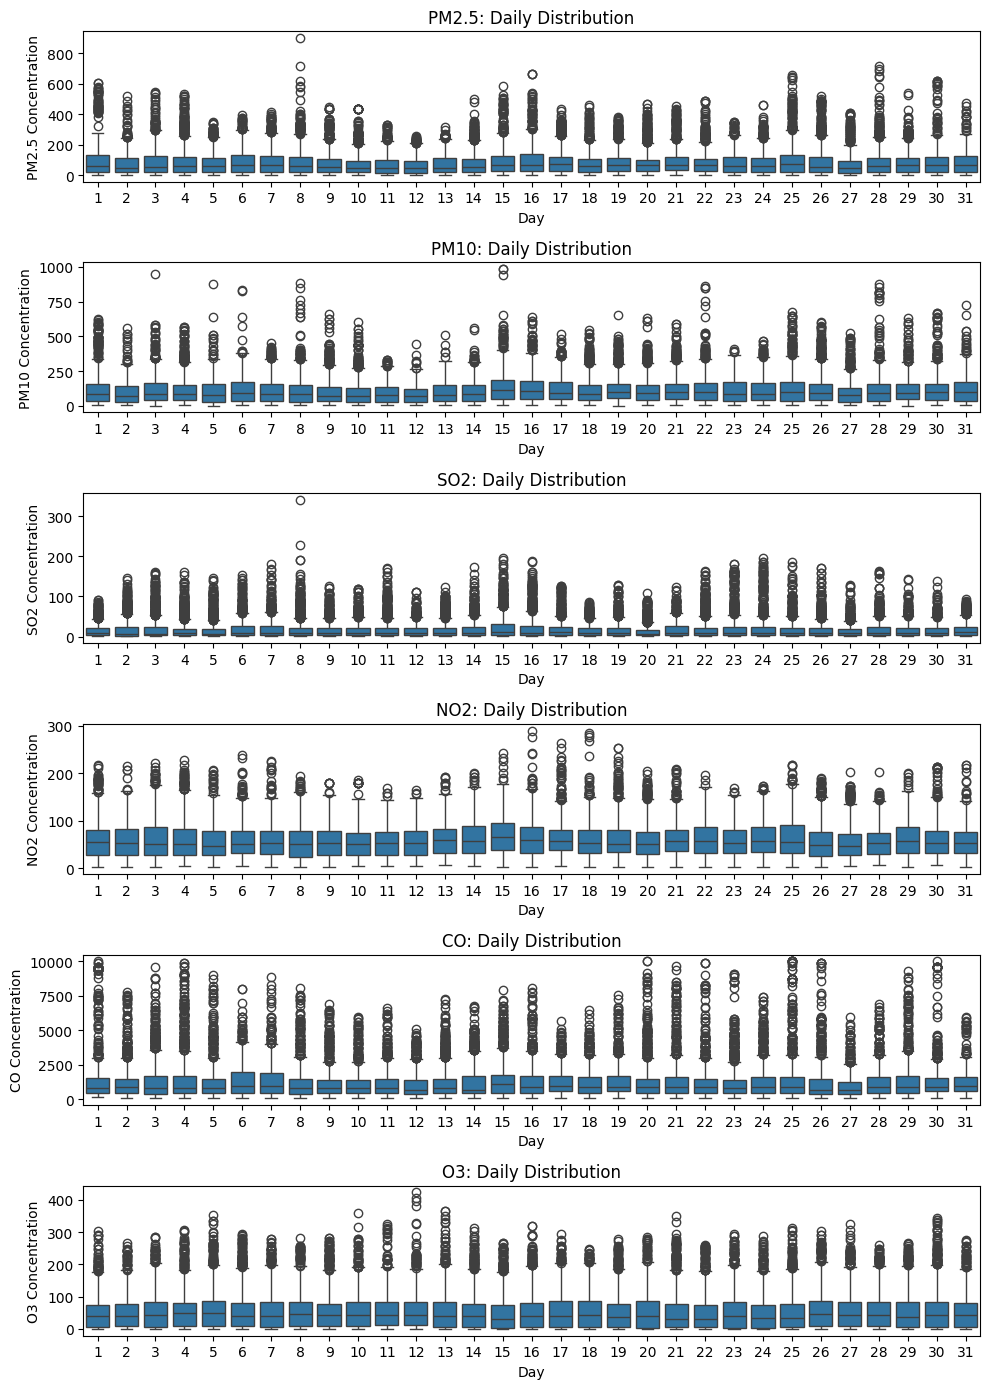

In [21]:
# Daily distribution of pollutants
plt.figure(figsize=(10, 14))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(6, 1, i)
    sns.boxplot(x=Aotizhongxin_clean_ts["day"], y=Aotizhongxin_clean_ts[pollutant])
    plt.title(f"{pollutant}: Daily Distribution")
    plt.xlabel("Day")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

1. PM2.5 (Fine Particulate Matter)
- Observation: The concentration fluctuates daily, with high variability and multiple extreme outliers.
- Peak Outliers: Observed around days 8, 16, and 28.
- Interpretation: High PM2.5 levels suggest intermittent pollution spikes
2. PM10 (Coarse Particulate Matter)
- Observation: Follows a similar pattern to PM2.5, with high outliers on several days.
- Peak Outliers: Found around days 3, 15, 22 and 28. The outliers could indicate localized pollution events.
3. SO2 (Sulfur Dioxide)
- Observation: The median SO2 concentration remains relatively stable, but the upper range increases after day 15.
- Peak Outliers: Found mainly on days 8, 15, and 24.
4. NO2 (Nitrogen Dioxide)
- Observation: NO2 levels increase around mid-month, with frequent outliers. The mid-month rise could be linked to changing weather conditions or increased vehicle usage.
- Peak Outliers: Day 16 & 18
5. CO (Carbon Monoxide)
- Observation: CO shows large daily variations, with significant outliers.
- Many days of the month have peak outliers. High CO concentrations suggest pollution from incomplete combustion, possibly from traffic congestion or industrial activities.
6. O3 (Ozone)
- Observation: O3 levels remain relatively stable, with moderate fluctuations and outliers.
- Peak Outliers: Day 12. Variability suggests changes in precursor pollutants and weather conditions.
  
Overall
- PM2.5 and PM10 have synchronized spikes, indicating common sources.
- SO2 and NO2 increase mid-month, likely from industrial and vehicular emissions.
- CO has extreme outliers, suggesting localized high-pollution events.
- O3 remains relatively steady, influenced by weather and precursor emissions.

#### 4.3.3. Monthly Distribution of Pollutants

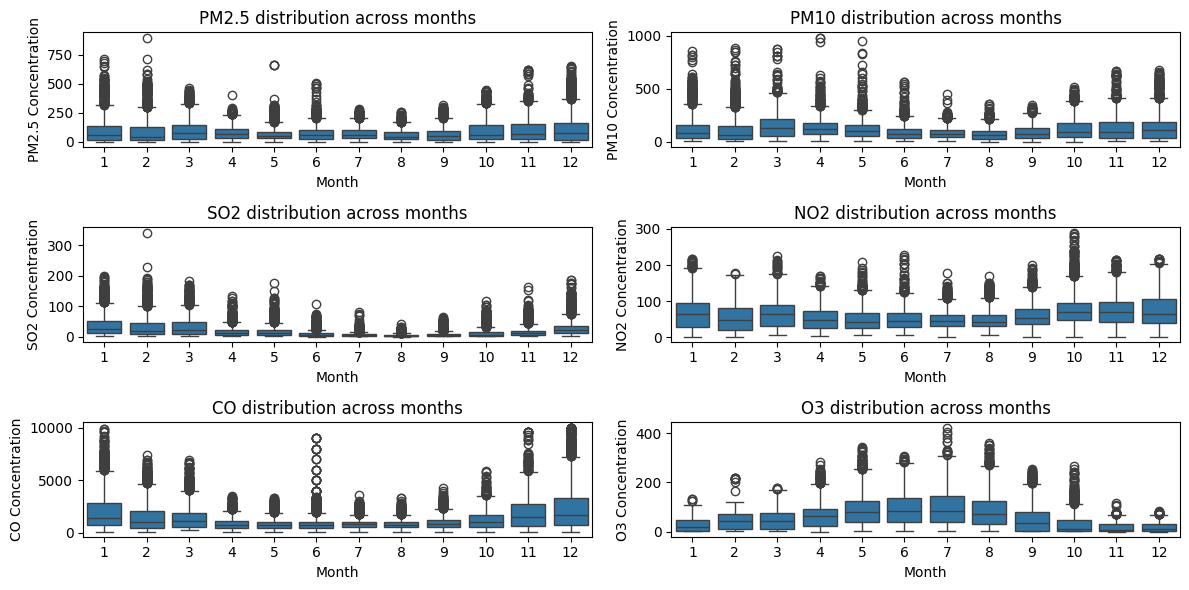

In [22]:
# Monthly distribution of pollutants
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=Aotizhongxin_clean_ts["month"], y=Aotizhongxin_clean_ts[pollutant])
    plt.title(f"{pollutant} distribution across months")
    plt.xlabel("Month")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

The boxplot visualization provides a monthly distribution of air pollutant concentrations.

Observations:
1. PM2.5 & PM10 (Top-left & Top-middle)
   - Highest in winter (Dec-Jan) and lowest in summer (Jun-Aug).
   - This trend suggests that cold weather increases air pollution due to heating activities, stagnant air, and temperature inversions.
   - The wide spread and high number of outliers indicate sporadic pollution spikes.

2. SO2 (Middle-left)
   - Significantly higher in winter months (Dec-Feb) compared to summer.
   - Likely due to increased coal and fuel combustion for heating.

3. NO2 (Middle-right)
   - Relatively stable but peaks during winter.
   - This is expected as NO2 is strongly linked to vehicle emissions, which can accumulate more in winter due to lower dispersion.

4. CO (Bottom-left)
   - Extreme variability with highest concentrations in winter months.
   - Winter heating and reduced dispersion lead to accumulation of CO in the atmosphere.

5. O3 (Bottom-right)
   - Opposite trend to other pollutants—highest in summer, lowest in winter.
   - This is because ozone is a secondary pollutant, formed by photochemical reactions in sunlight.
   - More solar radiation in summer leads to higher O3 levels.

General Takeaways:
- Winter months have the highest air pollution (except for O3).
- Summer shows the lowest levels of pollutants but high O3.
- Significant outliers across months indicate occasional extreme pollution events.

#### 4.3.4. Seasonal Distribution of Pollutants

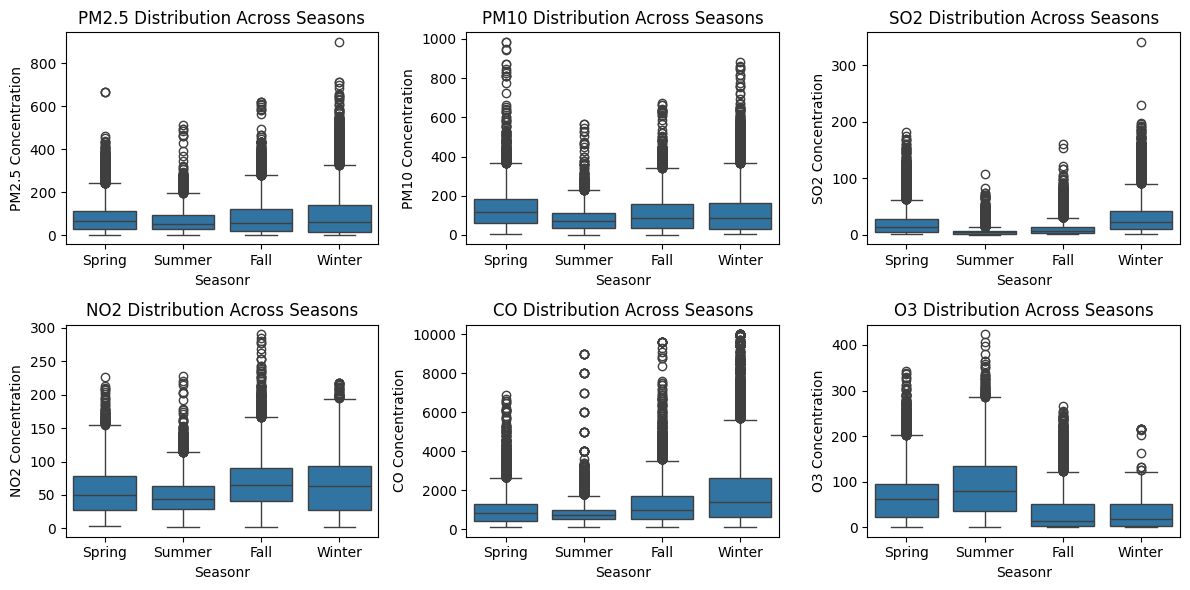

In [23]:
# Seasonal Distribution of Pollutants
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=Aotizhongxin_clean_ts["season"], y=Aotizhongxin_clean_ts[pollutant])
    plt.title(f"{pollutant} Distribution Across Seasons")
    plt.xlabel("Seasonr")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

1. PM2.5 (Fine Particulate Matter):
   - Winter has highest concentrations, with a larger spread and more outliers.
   - Spring and summer have relatively lower levels, but with occasional spikes, with summer having the lowest levels.
   - The presence of many outliers for each season suggests episodic high-pollution events
2. PM10 (Coarse Particulate Matter):
   - Follows a similar trend to PM2.5, with winter having the highest concentrations.
   - Summer and spring have slightly lower values, with summer having the lowest levels.
   - Winter shows more extreme values and outliers.
   - The presence of many outliers for each season suggests episodic high-pollution events
3. SO2 (Sulfur Dioxide):
   - Winter has significantly higher levels compared to other seasons with a large spread. This could be linked to increased coal or biomass burning in colder months.
   - Summer and fall have the lowest SO2 levels, with summer having the lowest levels. 
   - The presence of many outliers doe each season suggests episodic high-pollution events
4. NO2 (Nitrogen Dioxide):
   - Winter and fall have higher NO2 concentrations, likely due to more vehicular emissions and heating-related combustion.
   - The emissions for winter are more spread out with no outliers. Fall, summer and spring seasons have outliers which could suggest episodic high-pollution events
   - Summer and spring show lower concentrations, possibly due to atmospheric dispersion.
5. CO (Carbon Monoxide):
   - Winter shows a drastic increase in CO levels. With the levels being spread out.
   - The presence of high values and outliers in winter suggests combustion-related pollution.
   - Spring and summer have relatively lower levels, possibly due to better atmospheric mixing.
6. O3 (Ozone):
   - Highest in summer, which is expected because ozone formation is driven by sunlight and temperature.
   - Lowest in fall and winter since there is less sunlight for photochemical reactions, while fall shows the lowest median values.
   - Spring also has moderate levels. 

#### 4.3.5. Yearly Distribution of Pollutants

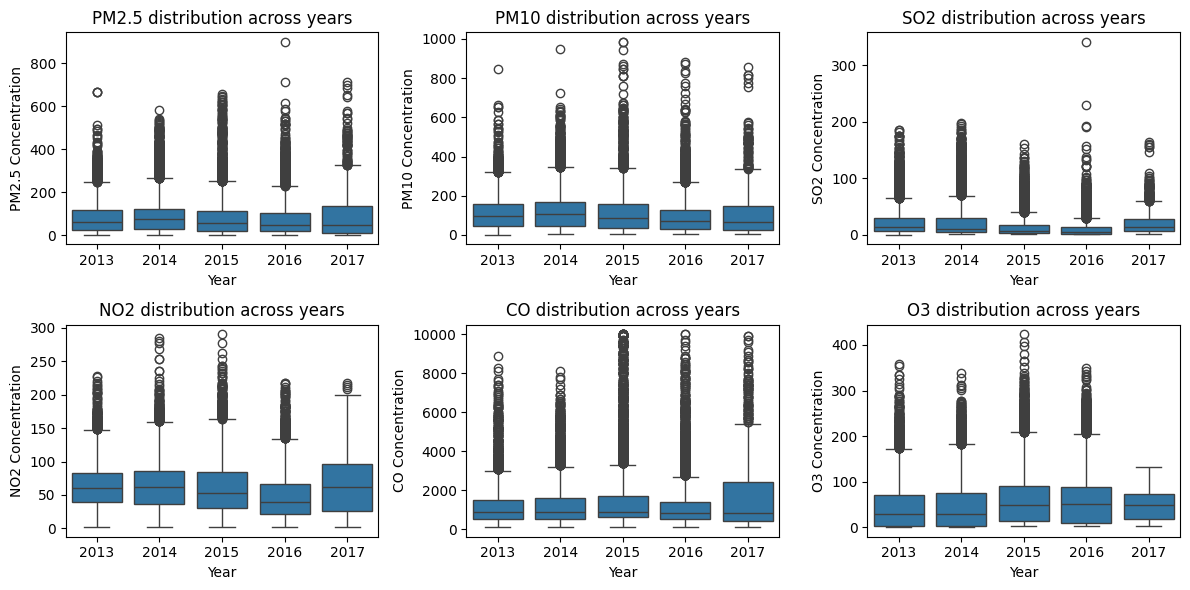

In [24]:
# Yearly Distribution of pollutants
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=Aotizhongxin_clean_ts["year"], y=Aotizhongxin_clean_ts[pollutant])
    plt.title(f"{pollutant} distribution across years")
    plt.xlabel("Year")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

1.  PM10
    - Median levels remain relatively stable across years.
    - Outliers are frequent and extreme, especially in 2015–2017.
    - Gradual increase in upper percentiles (75th percentile) in 2017, indicating a possible pollution spike.
1. PM2.5
   - Median levels remain relatively stable across years.
   - Outliers are frequent and extreme, especially in 2015–2017.
   - Gradual increase in upper percentiles (75th percentile) in 2017, indicating a possible pollution spike.
2. SO2
   - The median SO2 concentration remains low, suggesting effective pollution control.
   - However, 2016 has a higher number of extreme outliers, indicating sporadic high emissions.
3. NO2
   - The median remains stable, but 2017 shows a wider IQR and more high-end outliers.
   - This suggests an increase in NO2 levels from transportation or industrial sources.
4. CO
   - Wider spread and frequent outliers, especially in later years.
   - 2017 exhibits a significantly higher upper range, pointing to rising carbon monoxide emissions.
5. O3
   - No significant shift in the median, but higher variability over the years.
   - 2016 and 2017 show a larger spread, which may be linked to seasonal changes and precursor emissions.

Overall Insights:
- Most pollutants show a stable median but increasing upper ranges, indicating that while average air quality may not have worsened, extreme pollution events have become more frequent.
- The rise in outliers (spikes in pollution levels) could be due to seasonal variations, policy changes, or industrial activity.

### 4.4. Trend Analysis of Meterological data

#### 4.4.1. Daily Trends of Metereological Data over time

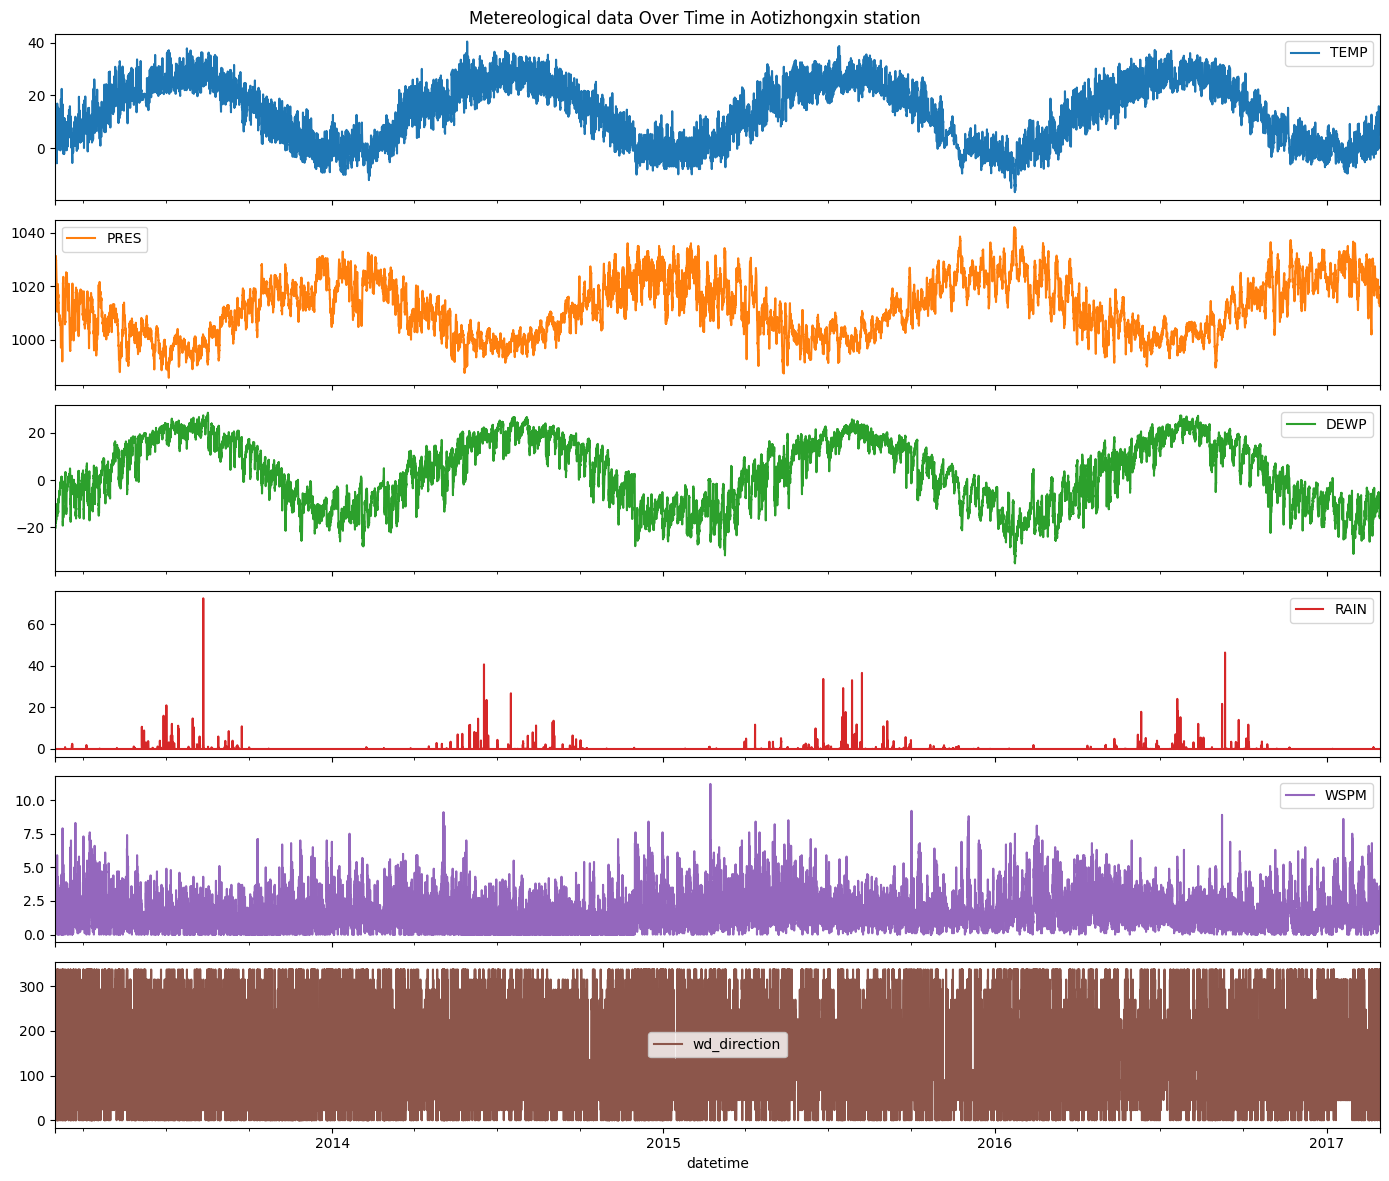

In [25]:
# plot the metereological data over time

# Create subplots
Aotizhongxin_clean_ts[metereologicals].plot(
    subplots=True, 
    layout=(6,1), 
    figsize=(14,12), 
    sharex=True,  # Ensures all plots share the same x-axis (time).
    title= f"Metereological data Over Time in Aotizhongxin station")

# Adjust layout
plt.tight_layout()
plt.show()

The plot showcases the daily trends of various meteorological parameters over time from 2013 to 2017. 

**1. Temperature (TEMP)**
- **Trend:** The temperature exhibits a **clear seasonal cycle**, peaking during summer and dropping during winter.
- **Interpretation:** This follows expected seasonal variations, indicating the region experiences **cold winters and warm summers**.

**2️. Pressure (PRES)**
- **Trend:** Pressure follows a similar cyclical pattern to temperature, increasing in winter and decreasing in summer.
- **Interpretation:** This suggests that **high-pressure systems dominate during winter**, leading to stable weather, while **lower pressure in summer** is associated with more dynamic atmospheric conditions.

**3️. Dew Point (DEWP)**
- **Trend:** The dew point follows the temperature cycle, decreasing in winter and increasing in summer.
- **Interpretation:** A higher dew point in summer means **higher moisture levels in the air**, whereas lower values in winter indicate **drier air**.

**4. Rainfall (RAIN)**
- **Trend:** Rainfall appears **sporadic**, with occasional spikes that indicate intermittent heavy rainfall events.
- **Interpretation:** This suggests that **rainfall is not evenly distributed throughout the year** but occurs in bursts, likely associated with storms or monsoons.

**5️. Wind Speed (WSPM)**
- **Trend:** Wind speed fluctuates throughout the period, with occasional high spikes, but remains within a limited range.
- **Interpretation:** Periods of high wind may be associated with **weather disturbances, seasonal changes, or storms**, while lower wind speeds could correspond to stagnant air conditions.

6. wd_direction (Wind Direction)**  
- Appears random, fluctuating across all directions (0-360°)

**Key Observations & Insights**
- **Seasonality is strong** across temperature, pressure, and dew point, aligning with annual climatic cycles.  
- **Rainfall is sporadic**, indicating it may be influenced by **storm systems or monsoonal effects** rather than a uniform seasonal pattern.  
- **Wind speed fluctuations** suggest periods of high and low air movement, which can impact pollution dispersion.

#### 4.4.2 Monthly trends in weather

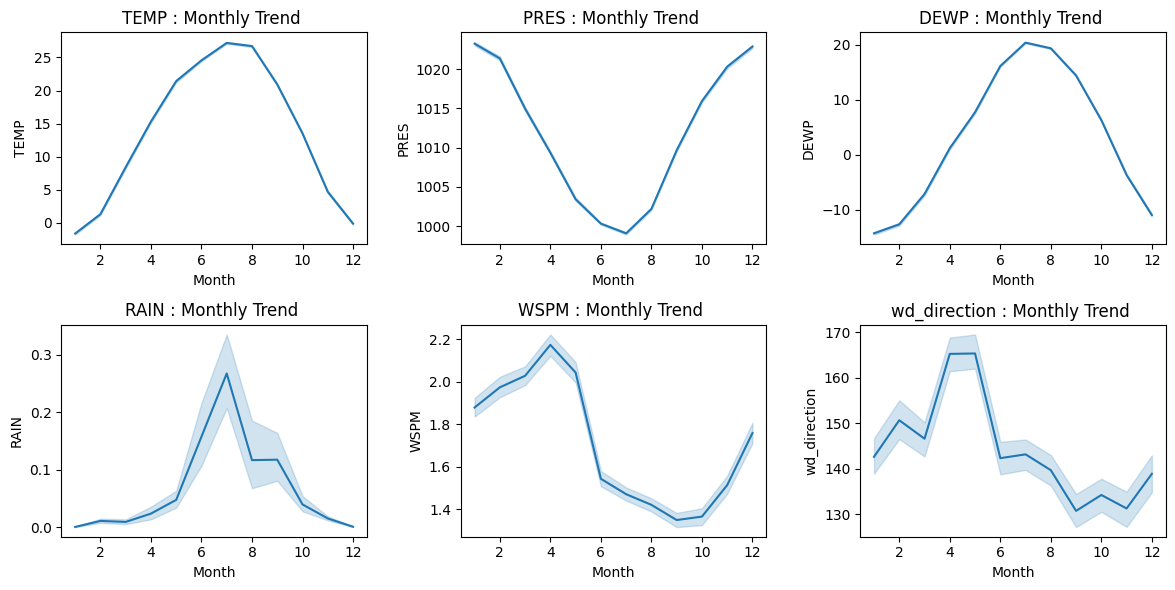

In [26]:
# Monthly Trend Analysis
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=Aotizhongxin_clean_ts["month"], y=Aotizhongxin_clean_ts[metereological])
    plt.title(f"{metereological} : Monthly Trend ")
    plt.xlabel("Month")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This visualization shows **monthly trends** for key meteorological variables across the year.

 **Key Observations:**
1. **Temperature (TEMP)**
   - **Peaks in July (~27°C)** and **drops to near 0°C in winter**.
   - A clear **seasonal trend**, consistent with a temperate climate.

2. **Pressure (PRES)**
   - **Lowest in summer (June–July)** and **highest in winter (December–January)**.
   - Likely due to **seasonal shifts in atmospheric pressure**.

3. **Dew Point (DEWP)**
   - **Follows the temperature pattern**, peaking in summer and dipping in winter.
   - Indicates higher moisture content in warm months and drier conditions in cold months.

4. **Rainfall (RAIN)**
   - **Sharp peak around June–July** (likely monsoon or rainy season).
   - Suggests a **wet summer and dry winter** climate pattern.

5. **Wind Speed (WSPM)**
   - **Higher in winter (Jan–Feb) and early spring (March–April)**.
   - **Lowest in summer (July–August)**, possibly due to stable atmospheric conditions.

6. **Wind Direction (wd_direction)**
   - **Shifts significantly around April–June**, suggesting seasonal changes in predominant wind flow.
   - Likely connected to **monsoon patterns or synoptic weather changes**.

#### 4.4.3. Seasonal trends in weather

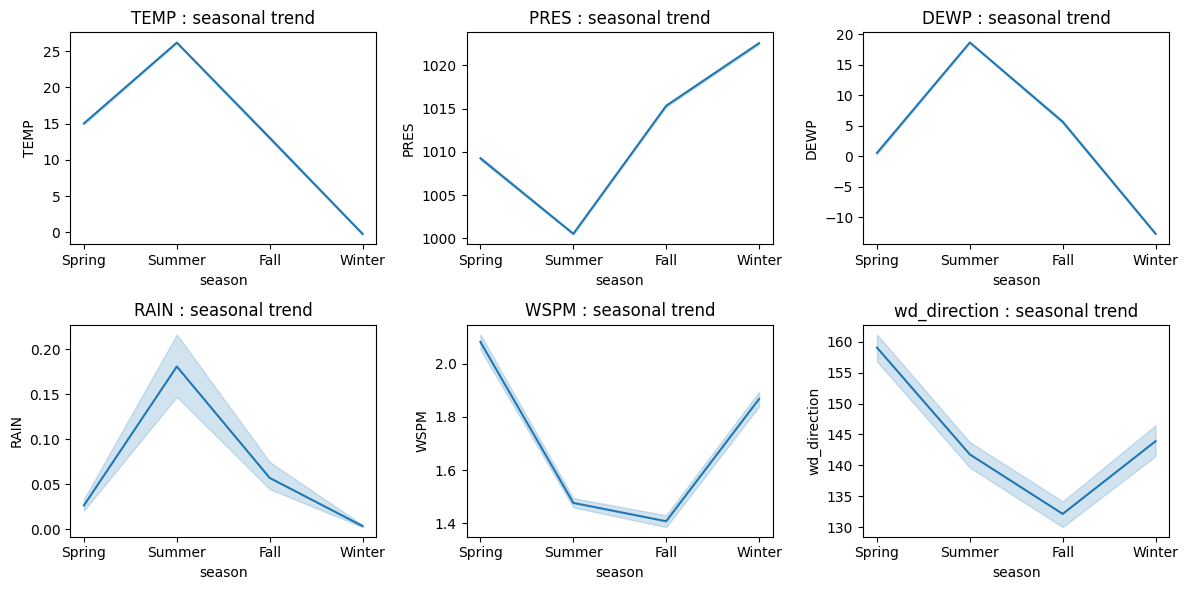

In [27]:
# Seasonal Trend Analysis
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=Aotizhongxin_clean_ts["season"], y=Aotizhongxin_clean_ts[metereological])
    plt.title(f"{metereological} : seasonal trend")
    plt.xlabel("season")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This visualization shows **seasonal trends** for key meteorological variables. 

**Observations by Season:**
1. **Temperature (TEMP)**
   - **Peaks in Summer (~27°C)**.
   - **Lowest in Winter (~0°C)**.
   - A clear **seasonal temperature cycle**.

2. **Pressure (PRES)**
   - **Lowest in Summer (~1002 hPa)**.
   - **Highest in Winter (~1022 hPa)**.
   - Suggests **seasonal atmospheric pressure shifts**, possibly due to monsoon activity.

3. **Dew Point (DEWP)**
   - **Follows temperature trends**, highest in Summer (~20°C) and lowest in Winter (~-10°C).
   - Indicates **high humidity in summer and dry winter air**.

4. **Rainfall (RAIN)**
   - **Sharp peak in Summer (~0.2)**, possibly indicating monsoon season.
   - **Minimal rainfall in Winter**.
   - Confirms a **wet summer, dry winter pattern**.

5. **Wind Speed (WSPM)**
   - **Strongest in Spring & Winter (~2.0 m/s)**.
   - **Weakest in Summer (~1.3 m/s)**.
   - Suggests **stronger winds during transitional seasons**.

6. **Wind Direction (wd_direction)**
   - **Changes significantly across seasons**.
   - **Sharpest drop from Spring to Fall (~160° → 130°)**.
   - Likely represents **monsoon-driven wind shifts**.

**Overall Insights:**
- **Summer is the warmest and wettest season**, likely due to monsoons.
- **Winter is the driest and coldest season**, with high atmospheric pressure.
- **Seasonal wind shifts and variations** suggest **climatic influence from large-scale weather patterns**.

#### 4.4.4. Yearly trends in weather

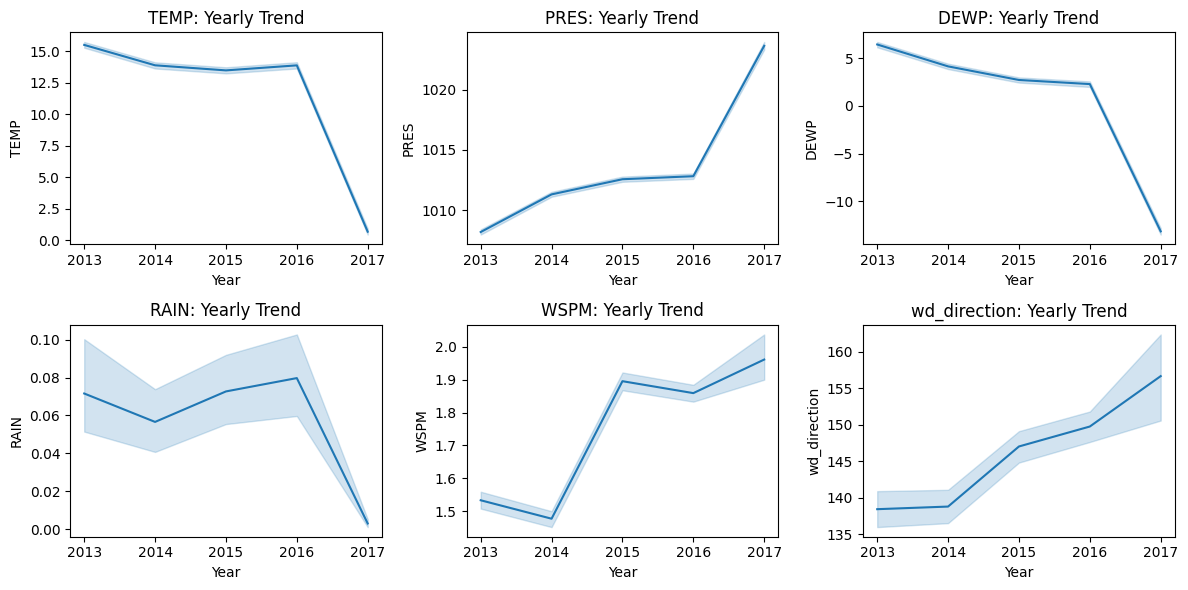

In [28]:
# Yearly Trends Analysis
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=Aotizhongxin_clean_ts["year"], y=Aotizhongxin_clean_ts[metereological])
    plt.title(f"{metereological}: Yearly Trend")
    plt.xlabel("Year")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This visualization presents yearly trends for key meteorological variables from 2013 to 2017.

Observations:
1. Temperature (TEMP)
   - Gradual decrease from 2013 to 2016, followed by a sharp drop in 2017.
   - This could indicate an unusual climate event or data incompleteness for 2017.

2. Pressure (PRES)
   - A steady increase over the years, with a sharp rise in 2017.
   - This could suggest changes in atmospheric circulation patterns.

3. Dew Point (DEWP)
   - Gradual decline from 2013 to 2016.
   - A sharp drop in 2017, mirroring temperature trends.
   - Suggests lower moisture levels in 2017, potentially affecting pollution dispersion.

4. Rainfall (RAIN)
   - Fluctuations but an overall increasing trend until 2016.
   - Sharp decline in 2017, which might indicate drier conditions.

5. Wind Speed (WSPM)
   - Increase from 2013 to 2015, followed by a slight dip and then another rise in 2017.
   - Increased wind speeds could help disperse pollutants.

6. Wind Direction (wd_direction)
   - Gradual increase over the years.
   - Indicates possible shifts in predominant wind patterns.

Possible Explanations:
- The sharp changes in 2017 (especially TEMP, DEWP, and RAIN) might indicate missing or incomplete data.
- The rising pressure and shifting wind directions could be linked to large-scale climatic changes or seasonal variations.

### 4.5 Distribution of weather over time

#### 4.5.1 Season distribution of weather parameters

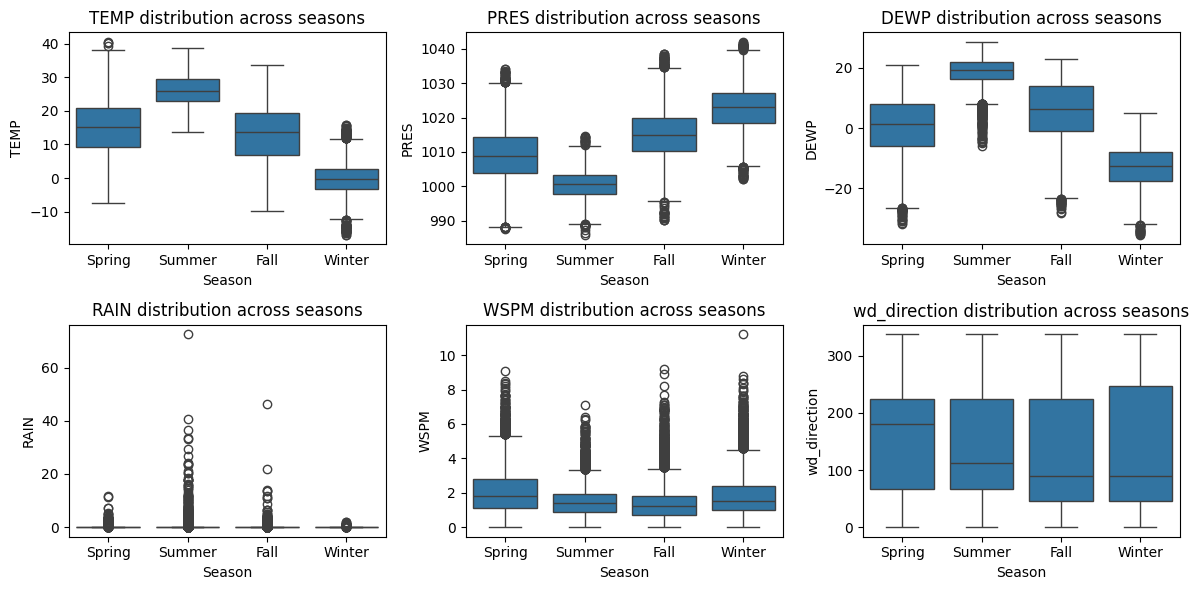

In [29]:
# Seasonal Boxplot Analysis
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=Aotizhongxin_clean_ts["season"], y=Aotizhongxin_clean_ts[metereological])
    plt.title(f"{metereological} distribution across seasons")
    plt.xlabel("Season")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This boxplot visualization showcases seasonal variations in different weather parameters:
1. **TEMP (Temperature)**
   - Peaks in **summer** and drops in **winter**.
   - Wider range in **spring** and **fall**.
   - Outlier temperature values in winter on both extremes, which is indicative of some very low temperatures and warmer temperatures in winter
   - An outlier temperature point in summer indicating a very high temperature of more than 30
1. **PRES (Pressure)**
   - Lower in **summer**, higher in **winter**.
   - Pressure is spread out in spring
   - There are outliers for all seasons indicating instances of very low and very high pressures.
2. **DEWP (Dewpoint)**
   - Highest in **summer**, lowest in **winter**.
   - Wide range in spring and fall seasons.
3. **RAIN (Rainfall)**
   - Significant outliers in **summer**, indicating extreme events.
   - Overall rainfall is on the lower end for all seasons
4. **WSPM (Wind Speed)**
   - Relatively consistent across seasons with outliers for all seasms indicating some extreme high speed winds.
5. **wd_direction (Wind Direction)**
   - Distributed across 0–360° without much seasonal variation.

#### 4.5.2. Monthly Distribution of Weather

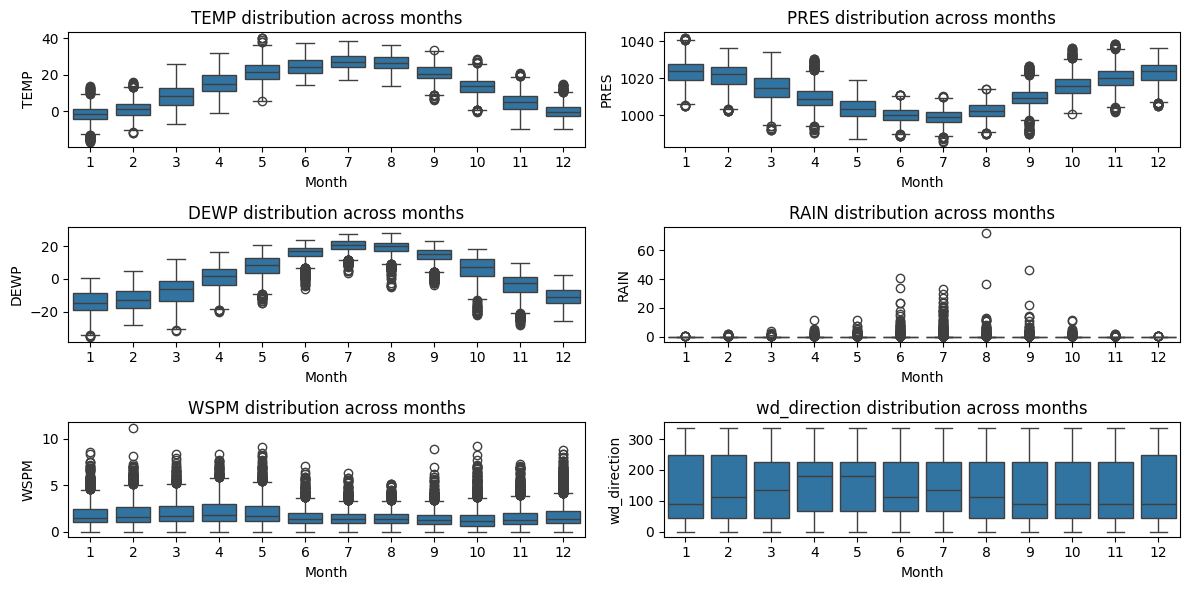

In [30]:
# Monthly distribution of weather data.
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=Aotizhongxin_clean_ts["month"], y=Aotizhongxin_clean_ts[metereological])
    plt.title(f"{metereological} distribution across months")
    plt.xlabel("Month")
    plt.ylabel(f"{metereological}")
plt.tight_layout()
plt.show()

This visualization presents **box plots** showing the distribution of various meteorological variables across months. 

 **Key Observations from Box Plots:**
1. **Temperature (TEMP)**
   - **Increases from January to July (~40°C max in summer).**
   - **Drops from August to December (~0°C in winter).**
   - Outliers in winter may indicate cold snaps.

2. **Pressure (PRES)**
   - **Decreases from January to June** and **rises from July to December**.
   - More variability in the middle months, possibly due to monsoonal effects.

3. **Dew Point (DEWP)**
   - **Follows temperature trends**—higher in summer, lower in winter.
   - Winter months have more variability and outliers, suggesting fluctuations in humidity.

4. **Rainfall (RAIN)**
   - **Extremely high variability in July and August**—monsoon activity.
   - Most months have very low rainfall except during monsoon peaks.

5. **Wind Speed (WSPM)**
   - **Generally stable, but highest values appear in Spring and Summer.**
   - Some extreme outliers suggest occasional strong wind events.

6. **Wind Direction (wd_direction)**
   - **Consistent distribution across months**.
   - Suggests **a dominant prevailing wind direction** with some seasonal shifts.

 **Overall Insights:**
- **Strong seasonality in temperature, dew point, and pressure.**
- **Monsoon impact is clear in rainfall and pressure fluctuations.**
- **Wind speed and direction remain relatively stable, with occasional extreme events.**

#### 4.5.3. Yearly Distribution of Weather

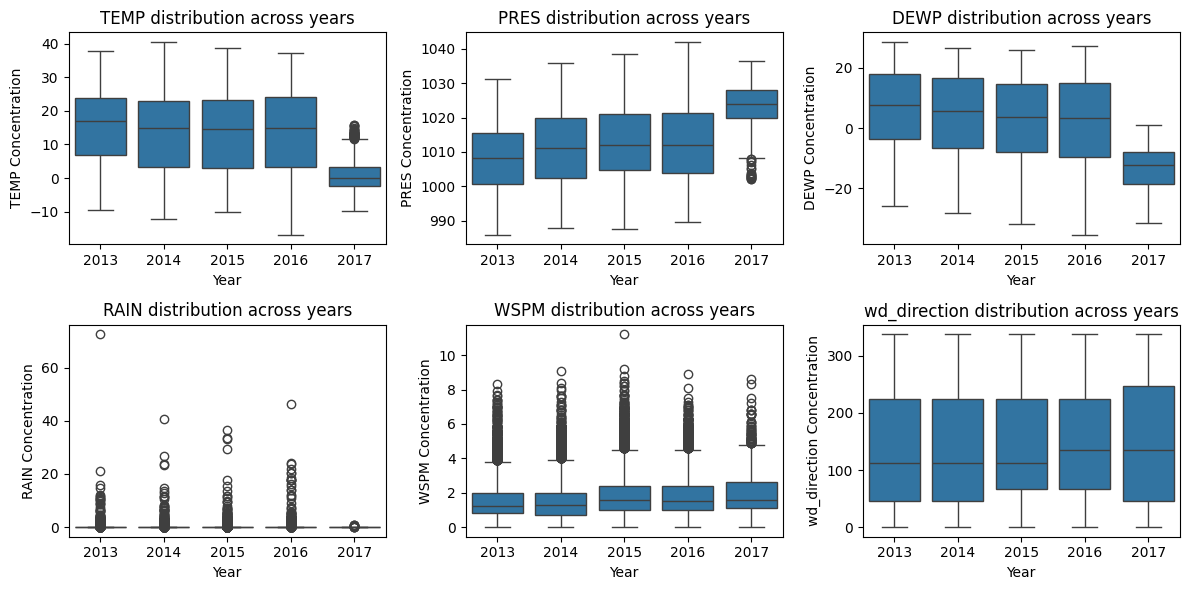

In [31]:
# Yearly Distribution of weather data
plt.figure(figsize=(12, 6))
for i, metereological in enumerate(metereologicals, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=Aotizhongxin_clean_ts["year"], y=Aotizhongxin_clean_ts[metereological])
    plt.title(f"{metereological} distribution across years")
    plt.xlabel("Year")
    plt.ylabel(f"{metereological} Concentration")
plt.tight_layout()
plt.show()

This image shows **box plots** illustrating the distribution of various weather parameters (TEMP, PRES, DEWP, RAIN, WSPM, and wd_direction) across different years from **2013 to 2017** in Aotizhongxin. 

**Observations from the Box Plots**:
1. **Temperature (TEMP)**:  
   - The median temperature is relatively consistent across the years.  
   - The range of temperatures (box spread) remains stable.  

2. **Pressure (PRES)**:  
   - There is a slight increase in median pressure from 2013 to 2017.  
   - 2017 shows a more **compressed distribution**, suggesting fewer fluctuations.  

3. **Dew Point (DEWP)**:  
   - Dew point values appear to decline in 2017, with more negative values (suggesting colder, drier air).  

4. **Rainfall (RAIN)**:  
   - Most rainfall values are **near zero**, but extreme outliers (heavy rainfall events) are present, particularly in **2013–2016**.  

5. **Wind Speed (WSPM)**:  
   - The wind speed distribution is relatively stable, but outliers (high wind speeds) are more common in 2013-2016.  

6. **Wind Direction (wd_direction)**:  
   - The range of wind direction is consistent across all years, with a fairly uniform distribution.  

**Overall**:
- **Temperature, pressure, and wind conditions remain fairly stable** over the years.  
- **2017 shows some distinct trends**, particularly **lower DEWP values and reduced variability in PRES**.  
- **Rainfall remains unpredictable**, with occasional extreme events.  

### 4.5. Wind speed and wind direction

In [32]:
# install windrose library. 
# !pip install windrose

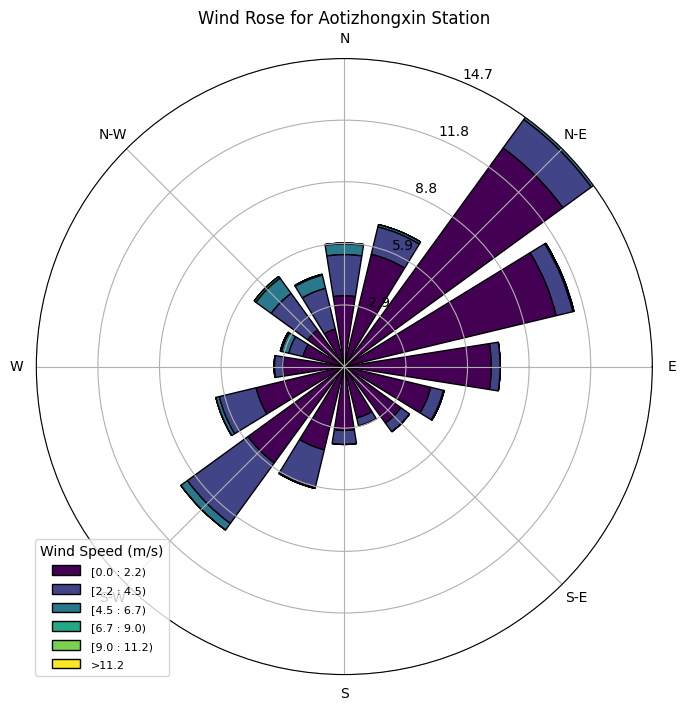

In [33]:
from windrose import WindroseAxes

# Visualization of wind direction and speed distribution using a windrose.
# Ensure wd (wind direction) and WSPM (wind speed) exist
if 'wd_direction' in Aotizhongxin_clean_ts.columns and 'WSPM' in Aotizhongxin_clean_ts.columns:
    # Remove NaN values
    wind_data = Aotizhongxin_clean_ts[['wd_direction', 'WSPM']].dropna()

    # Create windrose plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection="windrose")
    ax.bar(
        wind_data['wd_direction'], 
        wind_data['WSPM'], 
        normed=True, 
        opening=0.8, 
        edgecolor='black'
    )

    # Set labels
    ax.set_legend(title="Wind Speed (m/s)")
    plt.title(f"Wind Rose for Aotizhongxin Station")
    plt.show()
else:
    print("Error: 'wd' (Wind Direction) or 'WSPM' (Wind Speed) is missing from the dataset.")

**Wind Direction**
- The Northeast (NE) direction has the strongest and most frequent winds. 
- Other significant wind directions include East North East (ENE) and South West (SW), but they occur with lower intensity.
  
**Wind Speed**
- Most winds are weak to moderate:
- 0.0 - 1.6 m/s (dark purple): Light breezes, common and dominant.
- 1.6 - 3.2 m/s (dark blue): Slightly stronger but still moderate.
- 3.2 - 4.8 m/s (blue-green): Less frequent, indicating occasional strong gusts.
- Higher wind speeds (>4.8 m/s) are rare.
  
**Implications**
- Air Pollution Dispersion: Pollutants from industrial zones or traffic are likely transported in these dominant directions, impacting air quality in downwind areas.
- Air Quality Control: Low wind speeds (common here) can lead to stagnation of pollutants, causing higher pollution levels, especially in winter when temperature inversions occur.

### 4.6. Comparison of pollutants and wind direction

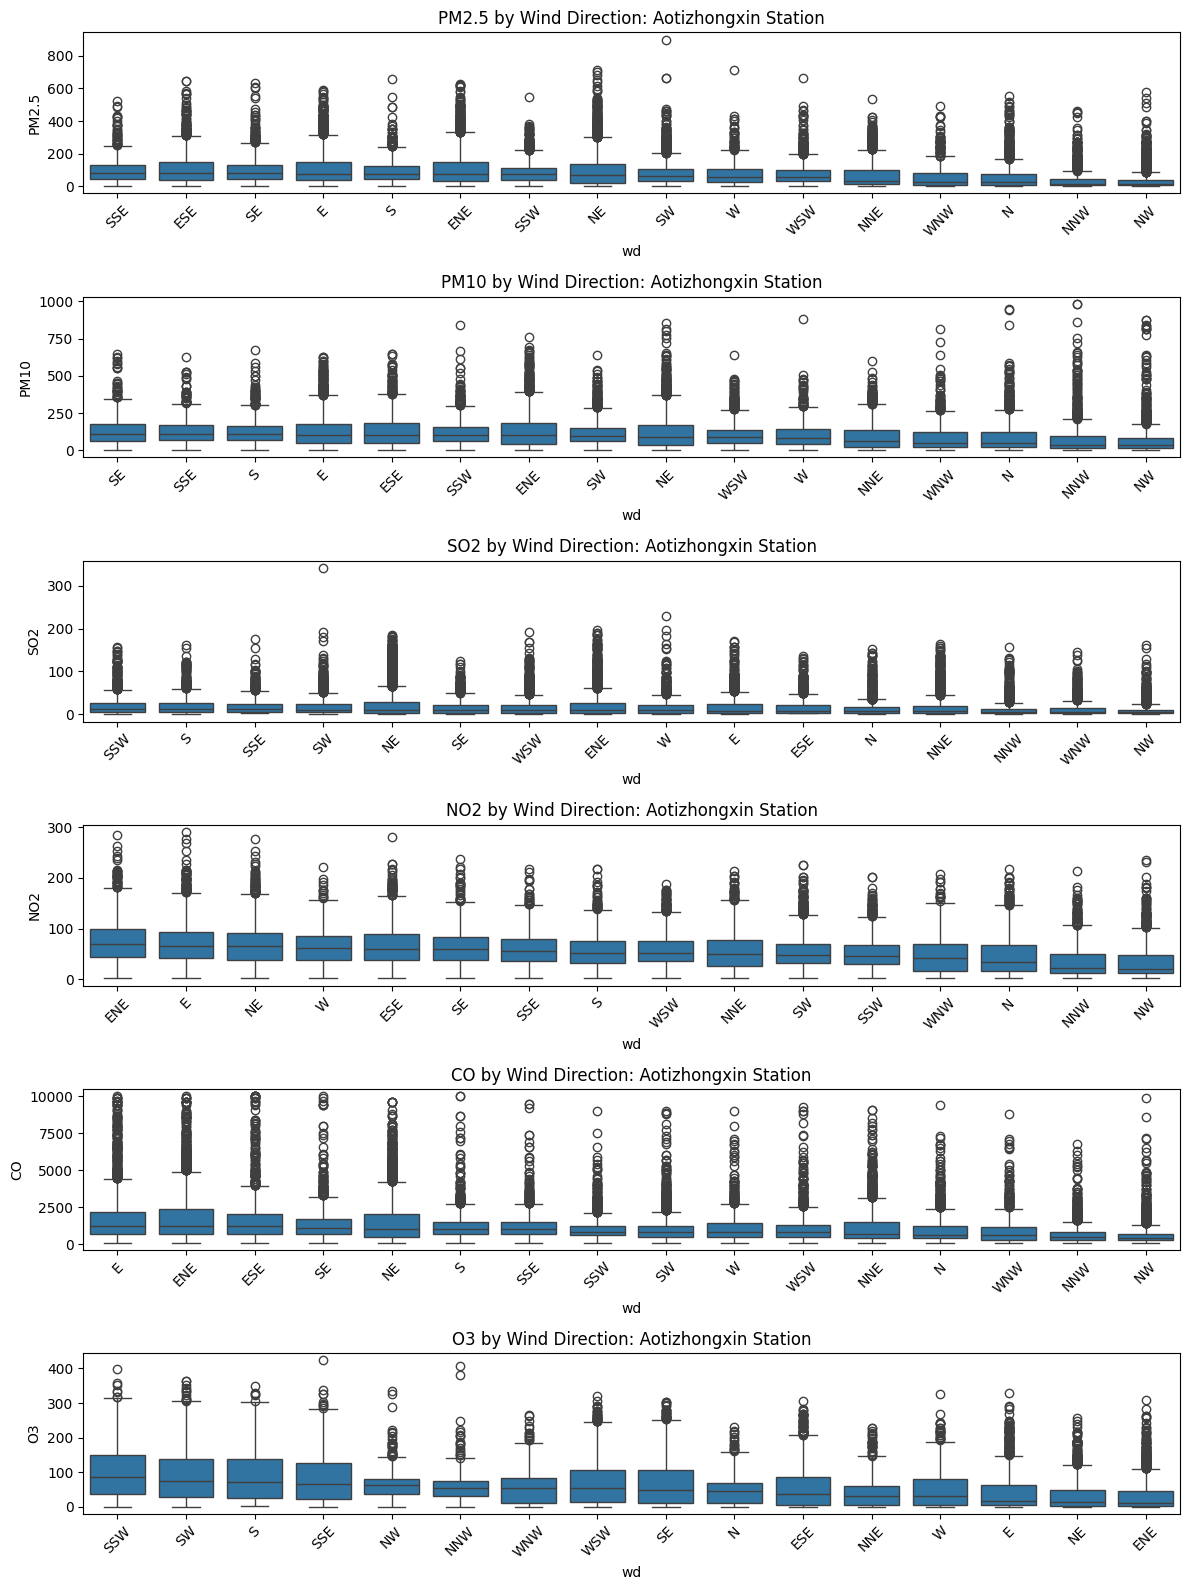

In [34]:
# Create boxplots to show pollution concentration per wind direction
plt.figure(figsize=(12, 16))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(6,1, i)

    # Order wind directions by median pollution concentration (highest to lowest)
    sorted_wd = (
        Aotizhongxin_clean_ts.groupby("wd")[pollutant]
        .median()
        .sort_values(ascending=False)
        .index
    )

    sns.boxplot(
        x=Aotizhongxin_clean_ts["wd"],
        y=Aotizhongxin_clean_ts[pollutant],
        order=sorted_wd
    )

    plt.title(f"{pollutant} by Wind Direction: Aotizhongxin Station")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Interpretation of the Boxplots: Pollution Concentration by Wind Direction**

These boxplots illustrate the distribution of different pollutant concentrations for each wind direction at the **Aotizhongxin Station**.

**Key Observations:**
1. **PM2.5:**
   - Higher concentrations are associated with SSE, ESE & SE wind directions.
   - These directions likely bring polluted air from industrial or urban areas.
   - The **wide interquartile range (IQR)** and numerous **outliers** indicate fluctuating pollution levels, possibly due to varying atmospheric conditions.

2. **PM10:**
   - Higher concentrations are associated with SSE, SE & S wind directions.
   - These directions likely bring polluted air from industrial or urban areas.
   - The **wide interquartile range (IQR)** and numerous **outliers** indicate fluctuating pollution levels, possibly due to varying atmospheric conditions.
  
3. **SO2**
   - **SO2 (Sulfur Dioxide)** levels are **higher in the South direction**.
   - This pollutant mainly originates from combustion sources (e.g., **power plants, traffic, and industry**), suggesting that emissions sources might be located in this direction relative to the station.

4. **NO2**
   - **NO2 (Nitrogen Dioxide)** levels are **higher in the East-Northeastern direction**.
   - This pollutant mainly originates from combustion sources (e.g., **power plants, traffic, and industry**), suggesting that emissions sources might be located in this direction relative to the station.
  
5. **CO (Carbon Monoxide):**
   - **ENE (East-Northeast) shows the highest CO levels**, indicating a dominant pollution source in that direction.
   - Significant variation with **high outliers** suggests episodic pollution events (e.g., traffic congestion, biomass burning, or industrial activity).

6. **O3 (Ozone):**
   - Unlike primary pollutants (PM, NO2, CO), **ozone (O3) is secondary**, forming through photochemical reactions.
   - Higher levels appear **under SSW & SW winds**, potentially indicating areas with more **sunlight exposure** and **fewer NO2 emissions**, which can otherwise scavenge ozone.

**Implications:**
- The **dominant wind directions influencing pollution levels** appear to be **ENE, ESE, and S**, suggesting these are key transport pathways for pollutants.
- **High pollution levels from the east and south** may indicate industrial zones, urban centers, or highways in those areas.
- **Low pollution levels in NW and N** suggest these directions bring cleaner air, possibly from natural or less populated areas.

### 4.7. Temperature versus Pollutants

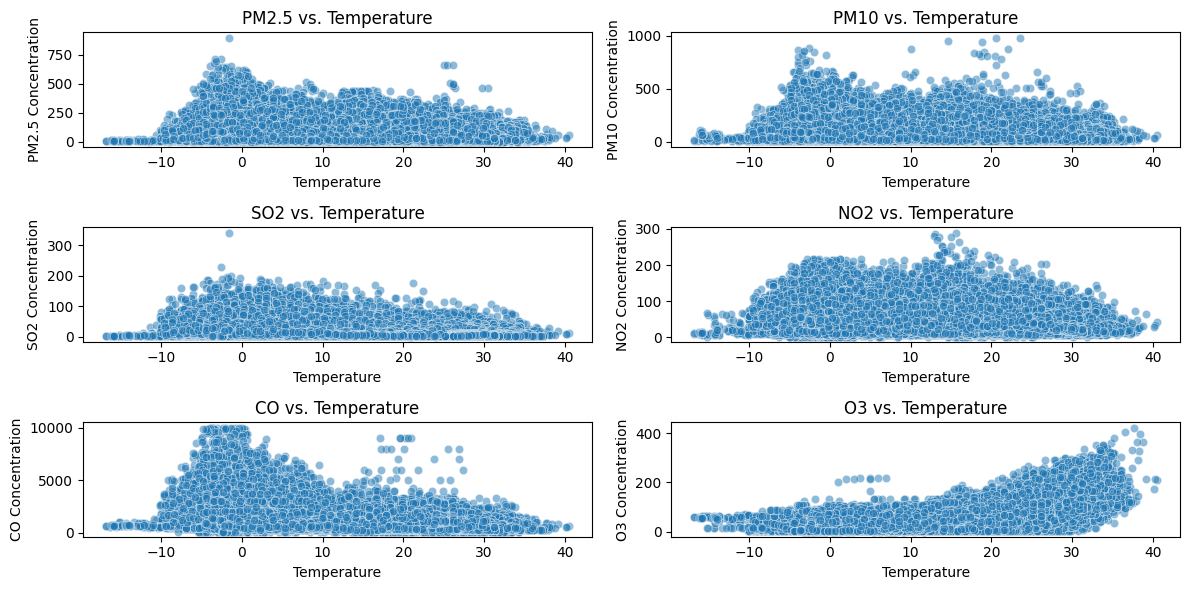

In [35]:
# Temperature vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=Aotizhongxin_clean_ts["TEMP"], y=Aotizhongxin_clean_ts[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Temperature")
    plt.xlabel("Temperature")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

1. PM2.5 vs. Temperature:
- Higher concentrations are observed at lower temperatures (between -5 & 0°C).
- A decreasing trend in PM2.5 as temperature increases suggests that cold weather worsens fine particulate pollution, likely due to inversions, heating emissions, and stagnant air in winter.
2. PM10 vs. Temperature:
- Similar to PM2.5, higher levels are concentrated in colder temperatures (between -5 & 0°C).
- Likely caused by increased coal/wood burning, lower dispersion, and higher emission sources during winter.
3. SO2 vs. Temperature:
- Strong inverse relationship: higher SO2 levels at lower temperatures.
- SO2 is typically linked to coal combustion and industrial heating, which increases in colder months.
4. NO2 vs. Temperature:
- Concentrations are generally higher in lower temperatures and decrease as temperature rises.
- NO2 is linked to vehicular and heating emissions, which tend to be higher in winter.
5. CO vs. Temperature:
- A very strong inverse relationship: high CO levels occur at lower temperatures.
- Cold weather increases incomplete combustion (e.g., vehicle emissions, wood burning) and reduces air dispersion.
6. O3 vs. Temperature:
- Opposite trend to other pollutants: Ozone (O3) increases with temperature.
- This aligns with the fact that ozone is formed through photochemical reactions, which are more active at higher temperatures.
  
Overall Insights:
- PM2.5, PM10, SO2, NO2, and CO are negatively correlated with temperature, meaning their levels are higher in cold weather due to combustion sources and poor air dispersion.
- O3 is positively correlated with temperature, as it forms more efficiently in warm, sunny conditions.
- hese trends reflect typical seasonal pollution patterns: higher particulate and gas pollutants in winter, and higher ozone levels in summer.

### 4.8. Pollutants versus pressure

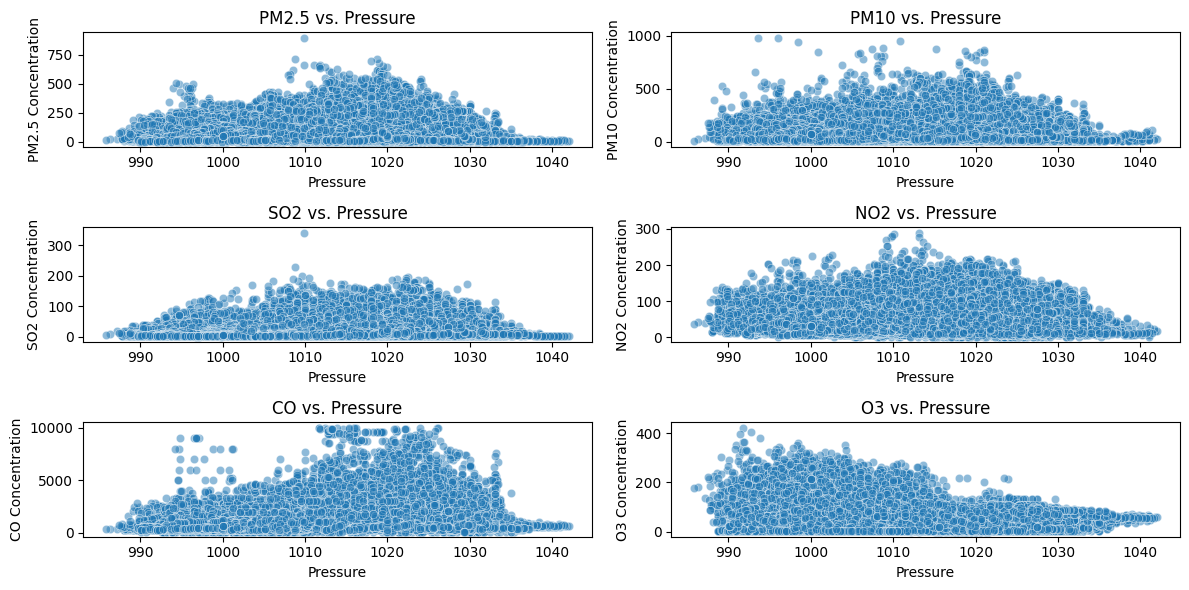

In [36]:
# Pressure vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=Aotizhongxin_clean_ts["PRES"], y=Aotizhongxin_clean_ts[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Pressure")
    plt.xlabel("Pressure")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

Key Observations for Each Pollutant:
1. **PM2.5 vs. Pressure:**
   - PM2.5 levels appear slightly **higher at mid-range pressures (1000–1020 hPa)**.
   - There is no **strong linear trend**, but higher PM2.5 levels may indicate atmospheric stability at certain pressures.

2. **PM10 vs. Pressure:**
   - Similar pattern to PM2.5, where PM10 is slightly more concentrated around **1000–1020 hPa**.
   - This suggests a potential link between stable atmospheric conditions and particle accumulation.

3. **SO2 vs. Pressure:**
   - No strong trend, but slightly **higher SO2 levels at mid-range pressures**.
   - SO2 tends to stay in the lower atmosphere under stable conditions, meaning higher concentrations can occur under **higher pressure systems with low air circulation**.

4. **NO2 vs. Pressure:**
   - Similar pattern to SO2, with **higher concentrations around 1000–1020 hPa**.
   - NO2, being a traffic-related pollutant, could accumulate under high-pressure conditions when dispersion is limited.

5. **CO vs. Pressure:**
   - CO levels show a **slight increase at mid-range pressures**.
   - This could be due to cold weather and stagnant air conditions during high-pressure events, leading to pollution buildup.

6. **O3 vs. Pressure:**
   - Ozone levels appear **higher at lower pressures and decrease at higher pressures**.
   - This aligns with the fact that **ozone forms more effectively in unstable, low-pressure conditions where sunlight and photochemical reactions are stronger**.
  
**Overall Insights:**
- **PM2.5, PM10, SO2, NO2, and CO show a slight increase in concentration at mid-range pressures (~1000–1020 hPa)**, suggesting **pollutant accumulation under stable atmospheric conditions**.
- **O3 decreases with increasing pressure**, which supports the idea that **low-pressure conditions promote photochemical ozone formation**.

### 4.9. Pollutants versus dewpoint

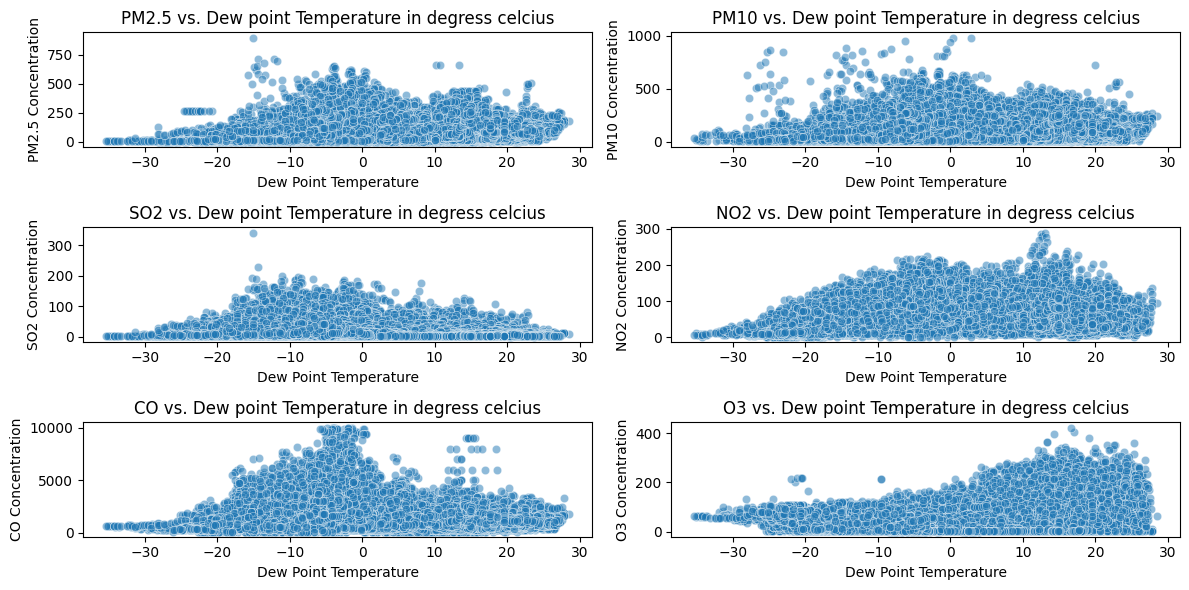

In [37]:
# Pressure vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=Aotizhongxin_clean_ts["DEWP"], y=Aotizhongxin_clean_ts[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Dew point Temperature in degress celcius")
    plt.xlabel("Dew Point Temperature")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

1. **General Trends**:  
   - Most pollutants seem to have higher concentrations at lower dew points (negative or near zero values).  
   - As dew point increases, pollutant concentrations appear to spread out more, especially for CO and O3.  

2. **CO and O3 Distinct Behavior**:  
   - CO concentrations have significant spikes at low dew points, suggesting that colder conditions might trap CO emissions.  
   - O3 concentration increases as dew point rises, indicating a possible link between ozone formation and humidity.  

3. **Particulate Matter (PM2.5, PM10)**:  
   - These appear to have a denser cluster in the middle dew point range (around -10°C to 10°C).  
   - At very low dew points, PM concentrations drop, possibly due to reduced atmospheric moisture affecting particle suspension.  

4. **SO2** 
   - Higher concentrations are seen at lower dew points, indicating stronger emissions or accumulation in drier and colder air.  

5. **NO2:**
- Higher concentrations at dew point range of -10 to around 15°C indicating stronger emissions or accumulation in drier and colder air. 

### 4.10. Pollutants versus rainfall

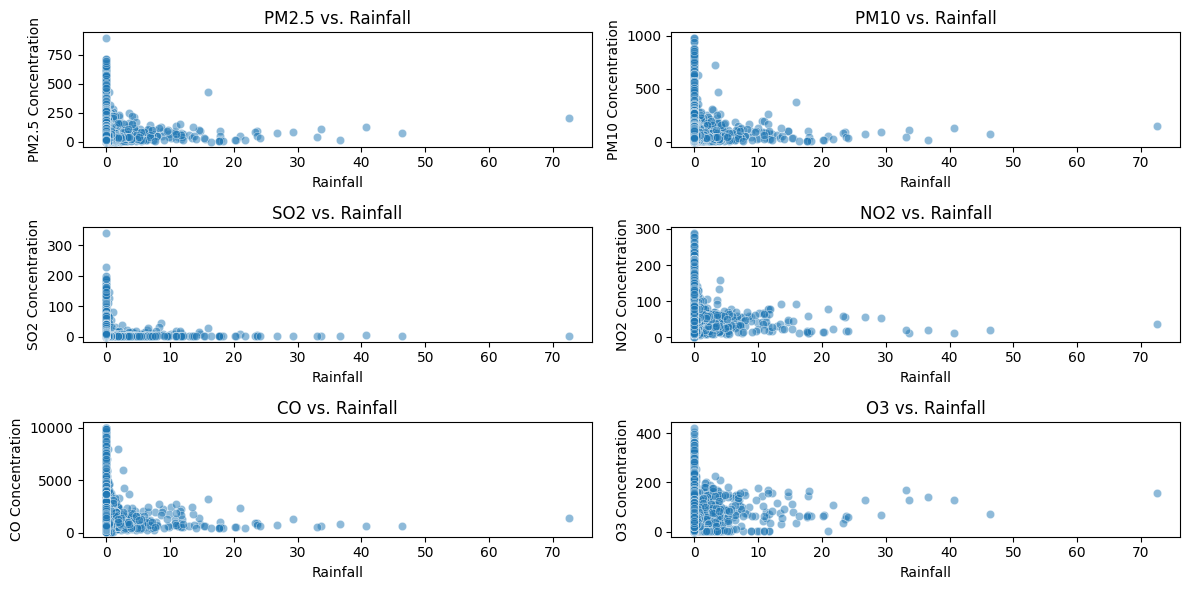

In [38]:
# Pressure vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=Aotizhongxin_clean_ts["RAIN"], y=Aotizhongxin_clean_ts[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Rainfall")
    plt.xlabel("Rainfall")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

**General Trend: Negative Correlation**
- Across all plots, a clear **negative correlation** between **rainfall** and pollutant concentration.
- High pollution levels are concentrated at **low rainfall values (near 0 mm)**.
- As **rainfall increases**, pollutant concentrations drop significantly, confirming the **"rain scavenging effect"**.

**Individual Pollutant Analysis**
**A. Particulate Matter (PM2.5 & PM10)**
- **Sharp decline with rainfall:** Indicates that rain is highly effective at **removing PM from the air**.
- **High PM values at 0 mm rainfall:** Suggests that on dry days, pollution accumulates due to stagnant air conditions.

**B. Sulfur Dioxide (SO₂)**
- **High SO2 levels at low rainfall**, then drops sharply.
- This supports the fact that SO2 is highly **soluble in water** and efficiently removed by rain.

#**C. Nitrogen Dioxide (NO2)**
- **Follows the same pattern as SO2**, showing a sharp decline after rainfall starts.
- NO2 is also **water-soluble**, meaning precipitation effectively reduces its concentration.
- **Lower NO2 levels after rainfall** reduce **ozone (O3) formation** since NO3 is a precursor to O3.

**D. Carbon Monoxide (CO)**
- CO concentrations **drop after rainfall** but not as drastically as PM or SO2.
- Unlike SO2 and NO2, **CO is not highly soluble in water**, meaning rain is less effective in removing it.
- CO reduction is likely due to **better atmospheric mixing** rather than direct rain removal.

**E. Ozone (O3)**
- Unlike other pollutants, O3 shows **more of a scattered pattern**
- **O3 is not directly washed away by rain**; instead, its formation depends on **sunlight and NO2 levels**.
- Some O3 values remain high even during rainfall, indicating **complex photochemical interactions**.

**Overall Insights**
- **Rainfall is a natural air purifier**, especially for PM2.5, PM10, SO2, and NO2.  
- **CO and O3 are less affected**.  

### 4.11. Pollutants versus windspeed

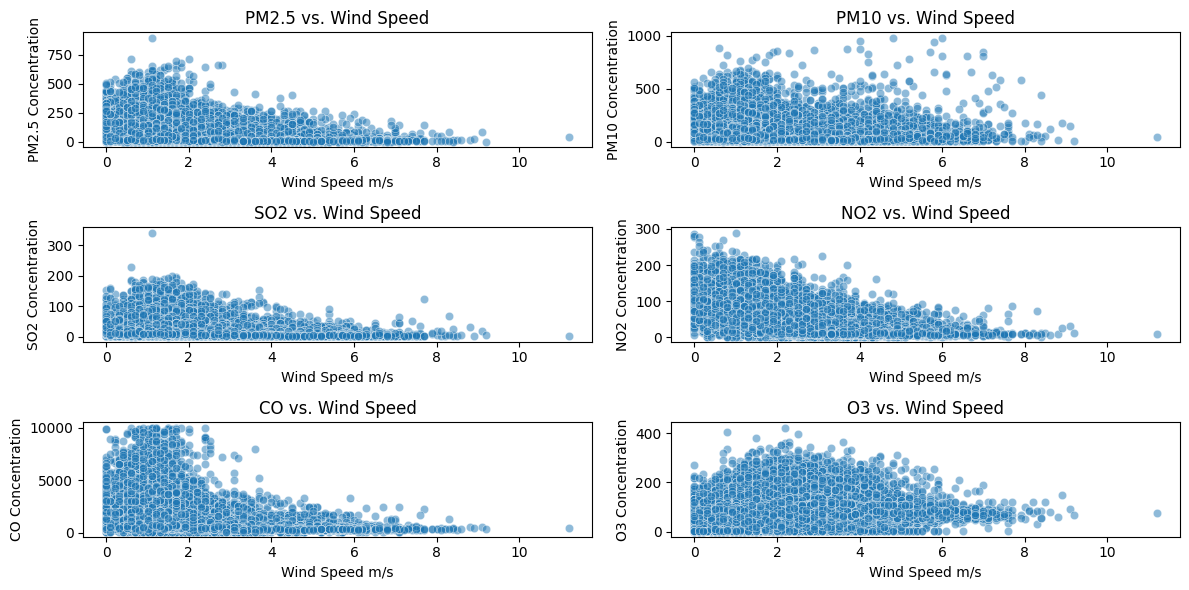

In [39]:
# Pressure vs. Pollutants (Scatter Plots)
plt.figure(figsize=(12, 6))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=Aotizhongxin_clean_ts["WSPM"], y=Aotizhongxin_clean_ts[pollutant], alpha=0.5)
    plt.title(f"{pollutant} vs. Wind Speed")
    plt.xlabel("Wind Speed m/s")
    plt.ylabel(f"{pollutant} Concentration")
plt.tight_layout()
plt.show()

**General Trend: Negative Correlation**
- All pollutants show a decreasing trend with increasing wind speed.
- Higher concentrations occur at low wind speeds (below 2 m/s).
- As wind speed increases, pollutant concentrations drop significantly.

**Individual Pollutant Analysis**
A. Particulate Matter (PM2.5 & PM10)
- Higher PM concentrations are found at lower wind speeds (<2 m/s).
- PM levels drop significantly as wind speed increases beyond 3-4 m/s. This suggests that wind is highly effective in dispersing PM pollutants.

B. Sulfur Dioxide (SO2)
- Higher SO2 concentrations are seen at low wind speeds.
- At wind speeds >3 m/s, SO2 levels decline sharply. This indicates that SO2 is highly affected by wind dispersal.

C. Nitrogen Dioxide (NO2)
- High NO2 at low wind speeds, decreasing with higher wind speeds. This follows the same pattern as SO2 since NO2 comes from vehicle emissions & industrial sources.
  
D. Carbon Monoxide (CO)
- CO levels are high at low wind speeds and drop as wind increases. However, the decline is less sharp compared to PM or SO2.
- CO is a lighter gas and not as easily washed out as PM. Wind disperses CO gradually rather than removing it completely.

E. Ozone (O3)
- Unlike other pollutants, O3 does not show a strong negative trend.
- O3 levels are more scattered, indicating a complex relationship with wind speed.

**Overall insights**
- Wind disperses most pollutants effectively, especially PM, SO2, and NO2.  
- Low wind speeds cause pollution accumulation, leading to poor air quality.  
- CO and O3 are less affected by wind speed.  

### 4.12. Correlation between pollutants and metereological parameters

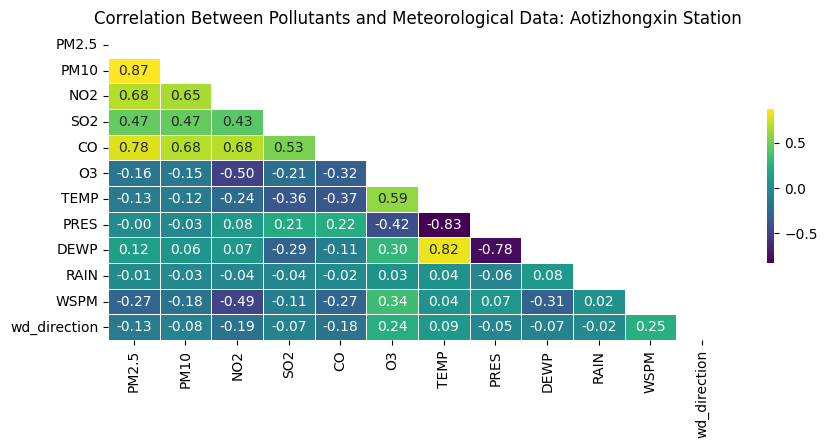

In [56]:
# Select relevant variables
columns = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3", 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'wd_direction']
df_corr = Aotizhongxin_clean_ts[columns].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr().round(2)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='viridis', linewidths=0.5, fmt='.2f', cbar_kws={'shrink': 0.5})
plt.title("Correlation Between Pollutants and Meteorological Data: Aotizhongxin Station")
plt.show()


In [ ]:
# Find pairs of features with Strong Positive Correlation
strong_corr_pairs = corr_matrix.unstack().reset_index()
strong_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[(strong_corr_pairs['Correlation'].between(0.7, 1.0)) & (strong_corr_pairs['Feature1'] != strong_corr_pairs['Feature2'])]

# Remove duplicate pairs
strong_corr_pairs['Pairs'] = strong_corr_pairs.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
strong_corr_pairs = strong_corr_pairs.drop_duplicates(subset='Pairs').drop(columns='Pairs')

strong_corr_pairs_sorted = strong_corr_pairs.sort_values(by='Correlation', ascending=False) # sort in descending order

print(f'Strong Positive Correlation pairs \n{strong_corr_pairs_sorted} \n')

Strong Positive Correlation pairs 
   Feature1 Feature2  Correlation
1     PM2.5     PM10         0.87
80     TEMP     DEWP         0.82
4     PM2.5       CO         0.78 



Strong positive linear relationship between: (as one variable increases, the other increases.)
- PM2.5 & PM10
- Temperature & Dewpoint Temperature
- PM 2.5 & Carbon Monoxide

In [ ]:
# Find pairs of features with Moderate Positive Correlation
moderate_corr_pairs = corr_matrix.unstack().reset_index()
moderate_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
moderate_corr_pairs = moderate_corr_pairs[(moderate_corr_pairs['Correlation'].between(0.4, 0.7)) & (moderate_corr_pairs['Feature1'] != moderate_corr_pairs['Feature2'])]

# Remove duplicate pairs
moderate_corr_pairs['Pairs'] = moderate_corr_pairs.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
moderate_corr_pairs = moderate_corr_pairs.drop_duplicates(subset='Pairs').drop(columns='Pairs')

moderate_corr_pairs_sorted = moderate_corr_pairs.sort_values(by='Correlation', ascending=False) # sort in descending order

print(f'Moderate Positive Correlation pairs \n{moderate_corr_pairs_sorted} \n')

Moderate Positive Correlation pairs 
   Feature1 Feature2  Correlation
2     PM2.5      NO2         0.68
16     PM10       CO         0.68
28      NO2       CO         0.68
14     PM10      NO2         0.65
66       O3     TEMP         0.59
40      SO2       CO         0.53
3     PM2.5      SO2         0.47
15     PM10      SO2         0.47
27      NO2      SO2         0.43 



Moderate linear relationship between the variables.

In [ ]:
# Find pairs of features Weak Positive Correlation
weak_p_corr_pairs = corr_matrix.unstack().reset_index()
weak_p_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
weak_p_corr_pairs = weak_p_corr_pairs[(weak_p_corr_pairs['Correlation'].between(0.0, 0.4)) & (weak_p_corr_pairs['Feature1'] != weak_p_corr_pairs['Feature2'])]

# Remove duplicate pairs
weak_p_corr_pairs['Pairs'] = weak_p_corr_pairs.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
weak_p_corr_pairs = weak_p_corr_pairs.drop_duplicates(subset='Pairs').drop(columns='Pairs')

weak_p_corr_pairs_sorted = weak_p_corr_pairs.sort_values(by='Correlation', ascending=False) # sort in descending order

print(f'Weak Positive Correlation pairs \n{weak_p_corr_pairs_sorted} \n')

Weak Positive Correlation pairs 
    Feature1      Feature2  Correlation
70        O3          WSPM         0.34
68        O3          DEWP         0.30
131     WSPM  wd_direction         0.25
71        O3  wd_direction         0.24
55        CO          PRES         0.22
43       SO2          PRES         0.21
8      PM2.5          DEWP         0.12
83      TEMP  wd_direction         0.09
31       NO2          PRES         0.08
105     DEWP          RAIN         0.08
32       NO2          DEWP         0.07
94      PRES          WSPM         0.07
20      PM10          DEWP         0.06
81      TEMP          RAIN         0.04
82      TEMP          WSPM         0.04
69        O3          RAIN         0.03
118     RAIN          WSPM         0.02
7      PM2.5          PRES        -0.00 



- Weak positive linear relationship between the pairs. 
- No linear relationship between PM2.5 & PRESSURE

In [ ]:
# Find pairs of features with weak negative correlation.
weak_n_corr_pairs = corr_matrix.unstack().reset_index()
weak_n_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
weak_n_corr_pairs = weak_n_corr_pairs[(weak_n_corr_pairs['Correlation'].between(-0.4, 0.0)) & (weak_n_corr_pairs['Feature1'] != weak_n_corr_pairs['Feature2'])]

# Remove duplicate pairs
weak_n_corr_pairs['Pairs'] = weak_n_corr_pairs.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
weak_n_corr_pairs = weak_n_corr_pairs.drop_duplicates(subset='Pairs').drop(columns='Pairs')

weak_n_corr_pairs_sorted = weak_n_corr_pairs.sort_values(by='Correlation', ascending=False) # sort in descending order

print(f'Weak Negative Correlation pairs \n{weak_n_corr_pairs_sorted} \n')

Weak Negative Correlation pairs 
    Feature1      Feature2  Correlation
7      PM2.5          PRES        -0.00
9      PM2.5          RAIN        -0.01
119     RAIN  wd_direction        -0.02
57        CO          RAIN        -0.02
19      PM10          PRES        -0.03
21      PM10          RAIN        -0.03
33       NO2          RAIN        -0.04
45       SO2          RAIN        -0.04
95      PRES  wd_direction        -0.05
93      PRES          RAIN        -0.06
107     DEWP  wd_direction        -0.07
47       SO2  wd_direction        -0.07
23      PM10  wd_direction        -0.08
46       SO2          WSPM        -0.11
56        CO          DEWP        -0.11
18      PM10          TEMP        -0.12
11     PM2.5  wd_direction        -0.13
6      PM2.5          TEMP        -0.13
17      PM10            O3        -0.15
5      PM2.5            O3        -0.16
59        CO  wd_direction        -0.18
22      PM10          WSPM        -0.18
35       NO2  wd_direction        -0.19
41     

Weak inverse relationship between the pairs.

In [ ]:
# Find pairs of features with moderate negative correlation.
moderate_n_corr_pairs = corr_matrix.unstack().reset_index()
moderate_n_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
moderate_n_corr_pairs = moderate_n_corr_pairs[(moderate_n_corr_pairs['Correlation'].between(-0.7, -0.4)) & (moderate_n_corr_pairs['Feature1'] != moderate_n_corr_pairs['Feature2'])]

# Remove duplicate pairs
moderate_n_corr_pairs['Pairs'] = moderate_n_corr_pairs.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
moderate_n_corr_pairs = moderate_n_corr_pairs.drop_duplicates(subset='Pairs').drop(columns='Pairs')

moderate_n_corr_pairs_sorted = moderate_n_corr_pairs.sort_values(by='Correlation', ascending=False) # sort in descending order

print(f'Moderate Negative Correlation pairs \n{moderate_n_corr_pairs_sorted} \n')

Moderate Negative Correlation pairs 
   Feature1 Feature2  Correlation
67       O3     PRES        -0.42
34      NO2     WSPM        -0.49
29      NO2       O3        -0.50 



Moderate inverse relationship implying as one variable increases, the other decreases for 0zone & pressure, nitrogen dioxide & Wind speend & ozone.  

In [ ]:
# Find pairs of features with strong negative correlation
strong_n_corr_pairs = corr_matrix.unstack().reset_index()
strong_n_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
strong_n_corr_pairs = strong_n_corr_pairs[(strong_n_corr_pairs['Correlation'].between(-1.0, -0.69)) & (strong_n_corr_pairs['Feature1'] != strong_n_corr_pairs['Feature2'])]

# Remove duplicate pairs
strong_n_corr_pairs['Pairs'] = strong_n_corr_pairs.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
strong_n_corr_pairs = strong_n_corr_pairs.drop_duplicates(subset='Pairs').drop(columns='Pairs')

strong_n_corr_pairs_sorted = strong_n_corr_pairs.sort_values(by='Correlation', ascending=False) # sort in descending order

print(f'Strong Negative Correlation pairs \n{strong_n_corr_pairs_sorted} \n')

Strong Negative Correlation pairs 
   Feature1 Feature2  Correlation
92     PRES     DEWP        -0.78
79     TEMP     PRES        -0.83 



Strong inverse relationship, therefore:
- PRES & DEWP - As pressure increases, dew point temperature reduces and vice versa. 
- TEMP & PRES - As temperature increases, pressure reduces and vice versa. 

In [69]:
# save the dataframe to use for forecasting as a csv file.
Aotizhongxin_clean_ts.to_csv('Aotizhongxin_ts.csv', index=True)